# Python for Finance - 6 - Using Machine Learning to Classify Companies for Investment

* Author: Cleiber Garcia
* Date: November/2023

* Goal: I taught myself how to use Python with financial data for making predictions. I put together this notebook while taking an online course called Python para Finanças ('Python for Finance') on Udemy, taught by Jones Granatyr (from IA Expert Academy). This notebook closely mirrors the one covered in class, with the effort I made to infuse my personal touch whenever possible and appropriate. I assure you that I meticulously wrote it line by line.

* Disclaimer: **Please be advised that all forecasts and patterns developed in the course of this training are 
intended solely for educational purposes. Under no circumstances should they be construed as 
investment advice.**

For more information please contact me at cleiber.garcia@gmail.com

# Summary
* [1. Initial Setup](#InitialSetup)
* [2. Preparing the Dataset for Processing](#PrepDataset)
* [3. Applying the Machine Learning Algorithms to Classify the Companies](#ApplyingMLAlg)
* [4. Clustering the Companies for Investiment](#ClusteringTheCompanies)

# 1. Initial Setup

## 1.1 Importing Python Modules

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Loading the Working Dataset

Os atributos (colunas) estão descritos no Trabalho de Conclusão de Curso do Sr Eduardo Alexandre, do Curso de Sistemas de Informação da UNISEP - União de Ensino do Sudoeste do Paraná, Brasil, em 2017. 

(The attributes (columns) are described in the Senior Thesis of Mr. Eduardo Alexandre, from the Information Systems course at UUNISEP - União de Ensino do Sudoeste do Paraná, Brazil, em 2017)

<a href='TCC_Eduardo_A_Franciscon.pdf'>TCC_Analise_Dados_e_Machine_Learning_Aplicado_a_Financas</a>

In [28]:
dataset = pd.read_excel('BD_Empresas_Investimento.xlsx')

In [29]:
# Print the dimensions of the dataset
dataset.shape

(377, 70)

In [30]:
# Print column names and attibutes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Situação             377 non-null    object 
 1   Empresa              377 non-null    object 
 2   Segmento             374 non-null    object 
 3   Valor de M.          319 non-null    float64
 4   EV                   285 non-null    float64
 5   Majoritar.           361 non-null    object 
 6   Pes. Fisicas         358 non-null    float64
 7   Categoria            348 non-null    object 
 8   LPA                  336 non-null    float64
 9   LPA desconctado      317 non-null    float64
 10  VPA                  339 non-null    float64
 11  P/L                  316 non-null    float64
 12  P/L descontado       311 non-null    float64
 13  EV/EBITDA            132 non-null    float64
 14  P/VPA                313 non-null    float64
 15  DPA                  141 non-null    flo

In [31]:
# Print the first 5 rows of the dataset
dataset.head()

Situação            Empresa          Segmento   Valor de M.            EV  \
0     ruim      aes elpa s.a   energia eletrica  1.334627e+09  4.391657e+09   
1      boa     tiet aes tiete  energia eletrica  1.519060e+10           NaN   
2     ruim      aflu afluente  energia eletrica  9.465319e+07  8.565319e+07   
3     ruim    aflu afluente t  energia eletrica  2.819886e+08  2.439886e+08   
4     ruim  rpad alfa holding            bancos  2.887665e+08  2.857665e+08   

                                          Majoritar.  Pes. Fisicas  \
0                  Brasiliana Participaçoes (98,26%)       15969.0   
1                 Aes Holdings Brasil ltda. (61,57%)       18681.0   
2  contour global do brasil participações ltda (9...        1898.0   
3                             neoenergia s.a (87,84)           8.0   
4               admistradora fortaliza ltda (89,14%)       11290.0   

              Categoria   LPA  LPA desconctado  ...    FCO    FCI    FCF  \
0                alerta  0.57             0.56  ...    NaN    NaN    NaN   
1            dividendos  0.18             0.18  ...  836.0 -126.0 -728.0   
2                alerta  0.16             0.15  ...    NaN    NaN    NaN   
3                alerta  0.21             0.20  ...    NaN    NaN    NaN   
4  crescimento moderado  0.60             0.60  ...    NaN    NaN    NaN   

    FCT    FCL  FCI/LL  CAPEX  FCL CAPEX  CAPEX/LL  CAPEX/FCO  
0   NaN    NaN     NaN    NaN        NaN       NaN        NaN  
1 -18.0  710.0    0.68 -139.0      696.0      26.0       17.0  
2   NaN    NaN     NaN    NaN        NaN       NaN        NaN  
3   NaN    NaN     NaN    NaN        NaN       NaN        NaN  
4   NaN    NaN     NaN    NaN        NaN       NaN        NaN  

[5 rows x 70 columns]

# 2. Preparing the Dataset for Processing <a id='PrepDataset'></a>

## 2.1 Eliminating Null Values

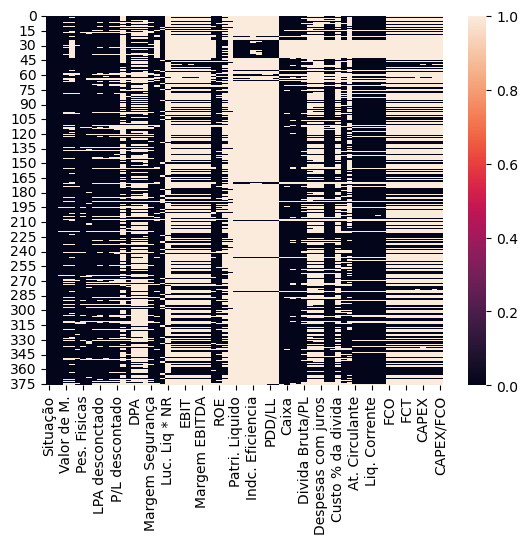

In [32]:
# Print a heatmap ir order to get a general view of null values
# (non-black in the heatmap corresponds to null values)
sns.heatmap(dataset.isnull());

In [33]:
# Print the count of null values per column
pd.options.display.max_rows = 400
dataset.isnull().sum()

Situação                 0
Empresa                  0
Segmento                 3
Valor de M.             58
EV                      92
Majoritar.              16
Pes. Fisicas            19
Categoria               29
LPA                     41
LPA desconctado         60
VPA                     38
P/L                     61
P/L descontado          66
EV/EBITDA              245
P/VPA                   64
DPA                    236
Dividend Yield         236
Payout                 257
Margem Segurança        56
Rec. Liquida            51
Luc. Liquido            52
Luc. Liq * NR          326
Resultado Bruto        240
Margem Bruta           240
EBIT                   238
D&A                    239
EBITDA                 238
Margem EBITDA          239
Res. Financeiro        239
Margem Liquida          59
ROE                     49
ROA                    222
SSS                    363
Patri. Liquido         348
RIF                    348
Margem Bancaria        348
Indc. Eficiencia       357
I

In [34]:
# Make a backup of the dataset
dataset_bkp = dataset.copy

In [35]:
# Drop columns with great incidence of null values
dataset.drop(labels = ['EV/EBITDA', 'DPA', 'Dividend Yield', 'Payout', 'Luc. Liq * NR', 
                      'Resultado Bruto', 'Margem Bruta', 'EBIT', 'D&A', 'EBITDA', 
                      'Margem EBITDA', 'Res. Financeiro', 'ROA', 'SSS', 'RIF', 
                      'Margem Bancaria', 'Indc. Eficiencia', 'Indc. Basileia', 'PDD',
                      'PDD/LL', 'Equity Multi.', 'Div Liquida/EBITDA', 'Indice de Cobertura',
                      'Patri. Liquido', 'Despesas com juros', 'Custo % da divida', 'IPL', 'FCO', 'FCI',
                      'FCF', 'FCT', 'FCL', 'FCI/LL', 'CAPEX', 'FCL CAPEX', 'CAPEX/LL', 'CAPEX/FCO', 
                      'Majoritar.'],
             axis = 1, inplace = True)

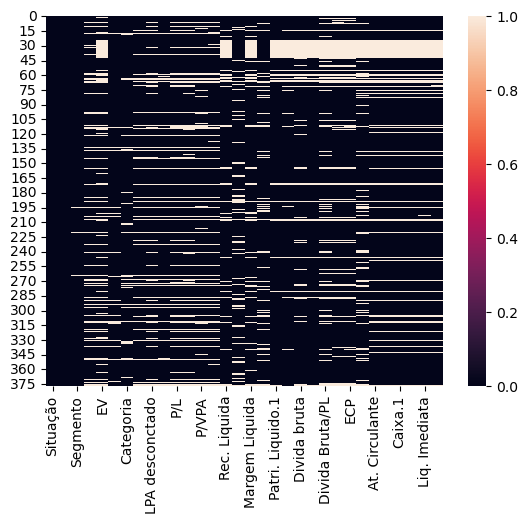

In [36]:
# Print a heatmap ir order to get a general view of null values
# (non-black in the heatmap corresponds to null values)
sns.heatmap(dataset.isnull());

In [38]:
# Print the new dataset shape
# The original shape was (377,70)
dataset.shape

(377, 32)

In [39]:
# Print the dataset's first 15 rows
dataset.head(15)

Situação                                            Empresa  \
0      ruim                                      aes elpa s.a    
1       boa                                     tiet aes tiete   
2      ruim                                      aflu afluente   
3      ruim                                    aflu afluente t   
4      ruim                                  rpad alfa holding   
5       boa                                      alsc aliansce   
6      ruim  all america latina logistica malha norte s.a frrn   
7      ruim                                   adhm advanced dh   
8       boa                                    alpa alpargatas   
9     medio                                   cbee ampla energ   
10     ruim                                        cant agpart   
11      boa                                     arzz arezzo co   
12     ruim                                       azev azevedo   
13      boa                                     abev ambev s.a   
14     ruim                                       atom atompar   

                          Segmento   Valor de M.            EV  Pes. Fisicas  \
0                 energia eletrica  1.334627e+09  4.391657e+09       15969.0   
1                 energia eletrica  1.519060e+10           NaN       18681.0   
2                 energia eletrica  9.465319e+07  8.565319e+07        1898.0   
3                 energia eletrica  2.819886e+08  2.439886e+08           8.0   
4                           bancos  2.887665e+08  2.857665e+08       11290.0   
5            exploração de imoveis  3.122133e+09  4.530133e+09         406.0   
6           transporte ferroviario           NaN           NaN           1.0   
7          produtos de uso pessoal  2.178028e+07  2.178028e+07         605.0   
8                         calçados  5.330196e+09  5.421196e+09        5974.0   
9                 energia eletrica  4.510893e+09  7.434893e+09         596.0   
10         holdings diversificadas           NaN           NaN           5.0   
11  tecidos, vestuarios e calçados  2.787681e+09  2.654681e+09         889.0   
12               construção pesada  4.914000e+07  5.414000e+07         198.0   
13        cervejas e refrigerantes  2.866893e+11  2.839263e+11       48756.0   
14                          outros  1.067939e+08  1.067939e+08        1946.0   

               Categoria   LPA  LPA desconctado    VPA  ...  Divida Bruta/PL  \
0                 alerta  0.57             0.56  36.03  ...             0.86   
1             dividendos  0.18             0.18   0.80  ...             1.72   
2                 alerta  0.16             0.15   2.07  ...              NaN   
3                 alerta  0.21             0.20   1.23  ...             0.04   
4   crescimento moderado  0.60             0.60  10.42  ...             0.25   
5                 alerta -0.05            -0.04  12.33  ...             0.54   
6                 alerta  0.44              NaN   1.85  ...             1.91   
7                 alerta -1.98            -1.98  -4.76  ...              NaN   
8   crescimento moderado  0.76             0.76   4.39  ...             0.24   
9                 alerta  2.25             2.25  23.14  ...             0.90   
10                alerta  0.44              NaN   1.87  ...             3.44   
11            dividendos  1.31             1.30   7.54  ...             0.21   
12                alerta  0.04             0.03   1.66  ...             0.70   
13  crescimento moderado  0.83             0.75   2.96  ...             0.16   
14                alerta   NaN              NaN  -0.38  ...              NaN   

       EF   ECP    EM  At. Circulante  Pas. Circulante  Caixa.1  \
0   49.00  11.0  3.94          4610.0           4508.0    545.0   
1   58.00  15.0  2.40           776.0            828.0    583.0   
2     NaN   NaN  1.24            12.0              8.0      9.0   
3    5.25  23.0  1.15            74.0              7.0     42.0   
4     NaN   NaN  1.01             6.0            

In [40]:
# Print the updated count of null values
pd.options.display.max_rows = 400
dataset.isnull().sum()

Situação             0
Empresa              0
Segmento             3
Valor de M.         58
EV                  92
Pes. Fisicas        19
Categoria           29
LPA                 41
LPA desconctado     60
VPA                 38
P/L                 61
P/L descontado      66
P/VPA               64
Margem Segurança    56
Rec. Liquida        51
Luc. Liquido        52
Margem Liquida      59
ROE                 49
Patri. Liquido.1    33
Caixa               41
Divida bruta        54
Divida Liquida      36
Divida Bruta/PL     81
EF                  66
ECP                 67
EM                  83
At. Circulante      60
Pas. Circulante     60
Caixa.1             60
Liq. Corrente       60
Liq. Imediata       61
Capital de giro     61
dtype: int64

In [41]:
# Change column's null values per the column's average value
dataset.fillna(dataset.mean(), inplace=True)

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_5416\2920057036.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.fillna(dataset.mean(), inplace=True)


In [42]:
# Print the updated count of null values
pd.options.display.max_rows = 400
dataset.isnull().sum()

Situação             0
Empresa              0
Segmento             3
Valor de M.          0
EV                   0
Pes. Fisicas         0
Categoria           29
LPA                  0
LPA desconctado      0
VPA                  0
P/L                  0
P/L descontado       0
P/VPA                0
Margem Segurança     0
Rec. Liquida         0
Luc. Liquido         0
Margem Liquida       0
ROE                  0
Patri. Liquido.1     0
Caixa                0
Divida bruta         0
Divida Liquida       0
Divida Bruta/PL      0
EF                   0
ECP                  0
EM                   0
At. Circulante       0
Pas. Circulante      0
Caixa.1              0
Liq. Corrente        0
Liq. Imediata        0
Capital de giro      0
dtype: int64

In [43]:
# Drop columns that still have null values
dataset.dropna(inplace=True)
dataset.shape

(347, 32)

In [44]:
# Print the updated count of null values
pd.options.display.max_rows = 400
dataset.isnull().sum()

Situação            0
Empresa             0
Segmento            0
Valor de M.         0
EV                  0
Pes. Fisicas        0
Categoria           0
LPA                 0
LPA desconctado     0
VPA                 0
P/L                 0
P/L descontado      0
P/VPA               0
Margem Segurança    0
Rec. Liquida        0
Luc. Liquido        0
Margem Liquida      0
ROE                 0
Patri. Liquido.1    0
Caixa               0
Divida bruta        0
Divida Liquida      0
Divida Bruta/PL     0
EF                  0
ECP                 0
EM                  0
At. Circulante      0
Pas. Circulante     0
Caixa.1             0
Liq. Corrente       0
Liq. Imediata       0
Capital de giro     0
dtype: int64

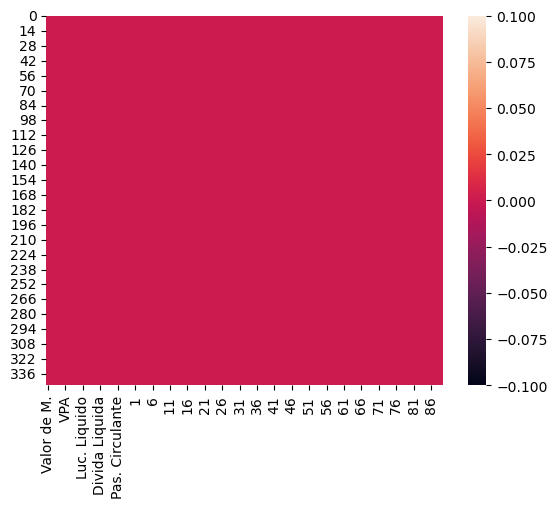

In [113]:
# Print a heatmap ir order to get a general view of null values
# (non-black in the heatmap corresponds to null values)
sns.heatmap(dataset.isnull());

## 2.2 Correcting Column Names

In [51]:
dataset.shape

(347, 32)

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 376
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Situação          347 non-null    object 
 1   Empresa           347 non-null    object 
 2   Segmento          347 non-null    object 
 3   Valor de M.       347 non-null    float64
 4   EV                347 non-null    float64
 5   Pes. Fisicas      347 non-null    float64
 6   Categoria         347 non-null    object 
 7   LPA               347 non-null    float64
 8   LPA desconctado   347 non-null    float64
 9   VPA               347 non-null    float64
 10  P/L               347 non-null    float64
 11  P/L descontado    347 non-null    float64
 12  P/VPA             347 non-null    float64
 13  Margem Segurança  347 non-null    float64
 14  Rec. Liquida      347 non-null    float64
 15  Luc. Liquido      347 non-null    float64
 16  Margem Liquida    347 non-null    float64
 1

In [57]:
# Count the quantity of companies in investiment situation: good (bom), medium (médio), ou bad (ruim)
np.unique(dataset['Situação'], return_counts=True)

(array(['boa', 'medio', 'ruim'], dtype=object),
 array([ 90,  85, 172], dtype=int64))

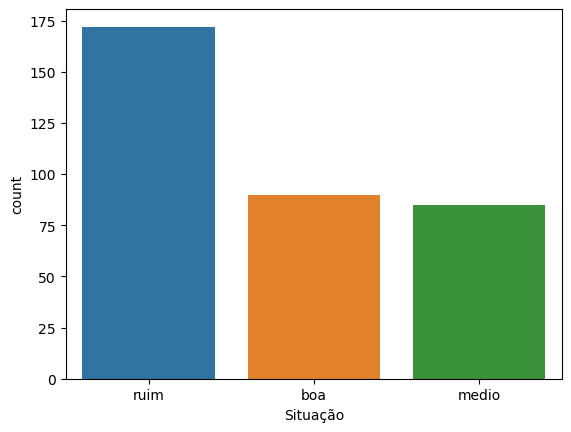

In [58]:
# Visualizing the count of situation: good (bom), medium (médio), ou bad (ruim)
sns.countplot(x = dataset['Situação']);

In [59]:
# Print the quantity of companies for each market segment
np.unique(dataset['Segmento'], return_counts=True)

(array(['acessorios', 'acessórios', 'agriculltura', 'agricultura',
        'agua e saneamento', 'alimentos', 'alimentos diversos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros', 'edificações',
        'eletrodomesticos', 'eletrodomésticos', 'embalagens',
        'energia eletrica', 'engenharia construtiva',
        'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
        'exploração de imoveis', 'exploração de rodovias',
        'exploração, refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings divers

In [65]:
# Function to correct errors in segment names
def corrige_segmento(texto):
    segmento = ''
    if texto == 'acessórios':
        segmento = 'acessorios'
    elif texto == 'agriculltura':
        segmento = 'agricultura'
    elif texto == 'alimentos diversos':
        segmento = 'alimentos'
    elif texto == 'eletrodomésticos':
        segmento = 'eletrodomesticos'
    elif texto == 'equipamentos e servicos':
        segmento = 'equipamentos'
    elif texto == 'mateial rodoviario':
        segmento = 'material rodoviario'
    elif texto == 'ser med hospit analises e diagnosticos' or texto == 'serv med hospit analises e disgnosticos' or texto == 'serv.med.hospit.analises e diagnosticos':
        segmento = 'hospitalar'
    elif texto == 'serviços de apoio e armazenamento':
        segmento = 'serviços de apoio e armazenagem'
    elif texto == 'serviços diversos s.a ctax':
        segmento = 'serviços diversos'
    elif texto == 'siderurgia':
        segmento = 'siderurgica'
    elif texto == 'soc. Credito e financiamento' or texto == 'soc credito e financiamento':
        segmento = 'credito'
    elif texto == 'tansporte aereo':
        segmento = 'transporte aereo'
    else:
        segmento = texto  

    return segmento

In [68]:
# Call the function to correct segment names with errors
dataset['Segmento'] = dataset['Segmento'].apply(corrige_segmento)

In [69]:
# Count the updated unique values in market segments
np.unique(dataset['Segmento'], return_counts=True)

(array(['acessorios', 'agricultura', 'agua e saneamento', 'alimentos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros', 'credito',
        'edificações', 'eletrodomesticos', 'embalagens',
        'energia eletrica', 'engenharia construtiva',
        'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
        'exploração de imoveis', 'exploração de rodovias',
        'exploração, refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings diversificadas', 'hospitalar', 'hotelaria',
        'intermediação imobilia

In [72]:
# Count the unique values in 'Categoria' 
# Company attractiveness level for investment
# ["alert", "growth", "growth", "moderate growth", "dividends", "dividends + growth"]
np.unique(dataset['Categoria'], return_counts=True)

(array(['alerta', 'crescimento', 'crescimento ', 'crescimento moderado',
        'dividendos', 'dividendos + crescimento'], dtype=object),
 array([243,  17,   1,  48,  36,   2], dtype=int64))

In [74]:
# Correct 'Categoria' names
def corrige_categoria(texto):
    categoria = ''
    if texto == 'crescimento ':
        categoria = 'crescimento'
    else:
        categoria = texto
  
    return categoria

In [75]:
dataset['Categoria'] = dataset['Categoria'].apply(corrige_categoria)

## 2.3 Exploring the Dataset

In [76]:
# Count the unique values in 'Categoria' 
# Company attractiveness level for investment
# ["alert", "growth", "moderate growth", "dividends", "dividends + growth"]
np.unique(dataset['Categoria'], return_counts=True)

(array(['alerta', 'crescimento', 'crescimento moderado', 'dividendos',
        'dividendos + crescimento'], dtype=object),
 array([243,  18,  48,  36,   2], dtype=int64))

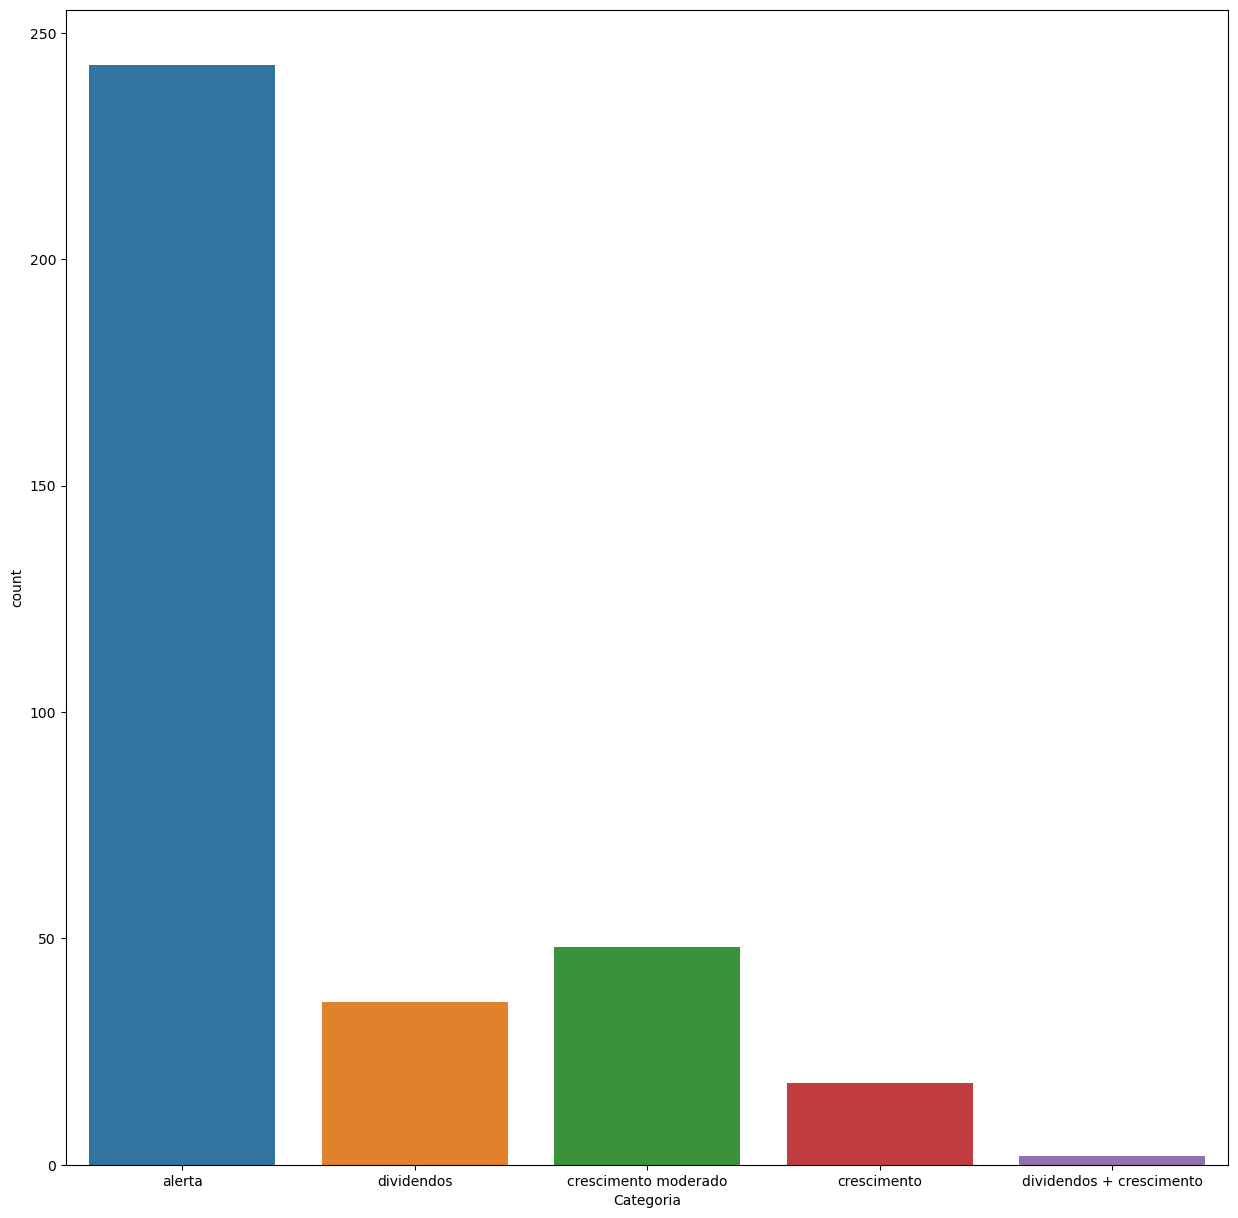

In [78]:
# Plot the unique values for each 'Categoria' (attractiveness level for investiment)
plt.figure(figsize=(15,15))
sns.countplot(x = dataset['Categoria']);

In [81]:
dataset.describe()

Valor de M.            EV  Pes. Fisicas         LPA  LPA desconctado  \
count  3.470000e+02  3.470000e+02  3.470000e+02  347.000000       347.000000   
mean   8.803913e+09  1.045164e+10  2.226064e+04   -7.862101        -9.044851   
std    2.715437e+10  3.435244e+10  1.309892e+05   65.493749        64.456790   
min    6.750600e+04 -2.623695e+07  1.000000e+00 -806.670000      -806.660000   
25%    1.651804e+08  3.716960e+08  5.805000e+02   -2.030000        -5.680000   
50%    1.362357e+09  3.583574e+09  1.773000e+03    0.130000         0.086000   
75%    8.596999e+09  1.021776e+10  6.354500e+03    1.185000         1.060000   
max    2.866893e+11  4.998736e+11  1.803724e+06  200.660000       160.780000   

                VPA         P/L  P/L descontado       P/VPA  Margem Segurança  \
count    347.000000  347.000000      347.000000  347.000000      3.470000e+02   
mean      38.573753   11.139852       12.873580    1.532269     -8.271226e+03   
std      842.780784   85.152313       81.671064    2.677774      7.839801e+04   
min    -3804.860000 -866.700000     -312.210000  -15.600000     -1.079664e+06   
25%        2.695000   -0.615000       -0.555000    0.475000     -8.590000e+02   
50%        9.470000    8.830000        9.580000    1.130000     -8.100000e+01   
75%       22.565000   14.765000       14.840000    1.700000     -1.555000e+00   
max    14896.470000  861.240000      952.660000   24.760000      1.344470e+05   

       ...  Divida Bruta/PL           EF         ECP           EM  \
count  ...       347.000000   347.000000  347.000000   347.000000   
mean   ...         1.763929    29.440006   38.957579    60.010565   
std    ...         4.358198   145.468109   23.070951   412.828926   
min    ...         0.000000 -1920.000000    0.000000     1.010000   
25%    ...         0.505000    21.500000   22.000000     1.950000   
50%    ...         1.110000    31.000000   38.872065     3.030000   
75%    ...         1.720811    52.500000   51.500000    43.680000   
max    ...        68.000000  1197.000000  100.000000  6723.190000   

       At. Circulante  Pas. Circulante       Caixa.1  Liq. Corrente  \
count      347.000000       347.000000    347.000000     347.000000   
mean      3419.550616      2637.292240   1337.298603       2.068703   
std       9719.816539      6880.722470   4362.187061       2.903694   
min          0.000000         1.000000      0.000000       0.000000   
25%        232.000000       203.500000     40.500000       0.970000   
50%       1307.000000      1022.000000    455.000000       1.660000   
75%       3259.653397      2536.304858   1274.283912       2.023817   
max     145907.000000     81167.000000  71664.000000      30.750000   

       Liq. Imediata  Capital de giro  
count     347.000000       347.000000  
mean        1.029286       772.802867  
std         2.563236      4676.082846  
min         0.000000    -34042.000000  
25%         0.170000        -1.500000  
50%         0.600000       243.000000  
75%         0.999146       714.528481  
max        30.500000     64740.000000  

[8 rows x 28 columns]

In [84]:
# Set to show all columns
pd.set_option('display.max_columns', None)

In [85]:
dataset[dataset['Divida Liquida'] == 199245.000000]

Situação                                 Empresa  \
284      boa  petroleo brasileiro s.a petrobras petr   

                              Segmento   Valor de M.            EV  \
284  exploração, refino e distribuição  1.857536e+11  4.998736e+11   

     Pes. Fisicas Categoria  LPA  LPA desconctado    VPA    P/L  \
284      288002.0    alerta -1.0              0.9  19.37 -14.15   

     P/L descontado  P/VPA  Margem Segurança  Rec. Liquida  Luc. Liquido  \
284           15.71   0.73            -181.0      270810.0    307.596923   

     Margem Liquida   ROE  Patri. Liquido.1    Caixa  Divida bruta  \
284            4.94  10.0          288806.0  59223.0      258468.0   

     Divida Liquida  Divida Bruta/PL    EF   ECP    EM  At. Circulante  \
284        199245.0             0.92  44.0  10.0  3.33        145907.0   

     Pas. Circulante  Caixa.1  Liq. Corrente  Liq. Imediata  Capital de giro  
284          81167.0  71664.0            1.8           0.88          64740.0

In [86]:
dataset[dataset['Caixa'] == -0.125000]

Situação                Empresa Segmento   Valor de M.            EV  \
376     ruim  524 participações s.a   outros  8.596999e+09  1.021776e+10   

     Pes. Fisicas Categoria       LPA  LPA desconctado        VPA        P/L  \
376           1.0    alerta -7.560357        -8.723009  37.412006  10.669968   

     P/L descontado     P/VPA  Margem Segurança  Rec. Liquida  Luc. Liquido  \
376       12.338617  1.677604       -7975.95134   4752.448221    307.596923   

     Margem Liquida        ROE  Patri. Liquido.1  Caixa  Divida bruta  \
376       12.658474  18.404238       3709.284884 -0.125   3203.312693   

     Divida Liquida  Divida Bruta/PL         EF        ECP         EM  \
376     2080.015076         1.720811  30.548746  38.872065  62.646871   

     At. Circulante  Pas. Circulante      Caixa.1  Liq. Corrente  \
376     3259.653397      2536.304858  1274.283912       2.023817   

     Liq. Imediata  Capital de giro  
376       0.999146       714.528481

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_5416\3704877264.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.hist(ax=eixo);


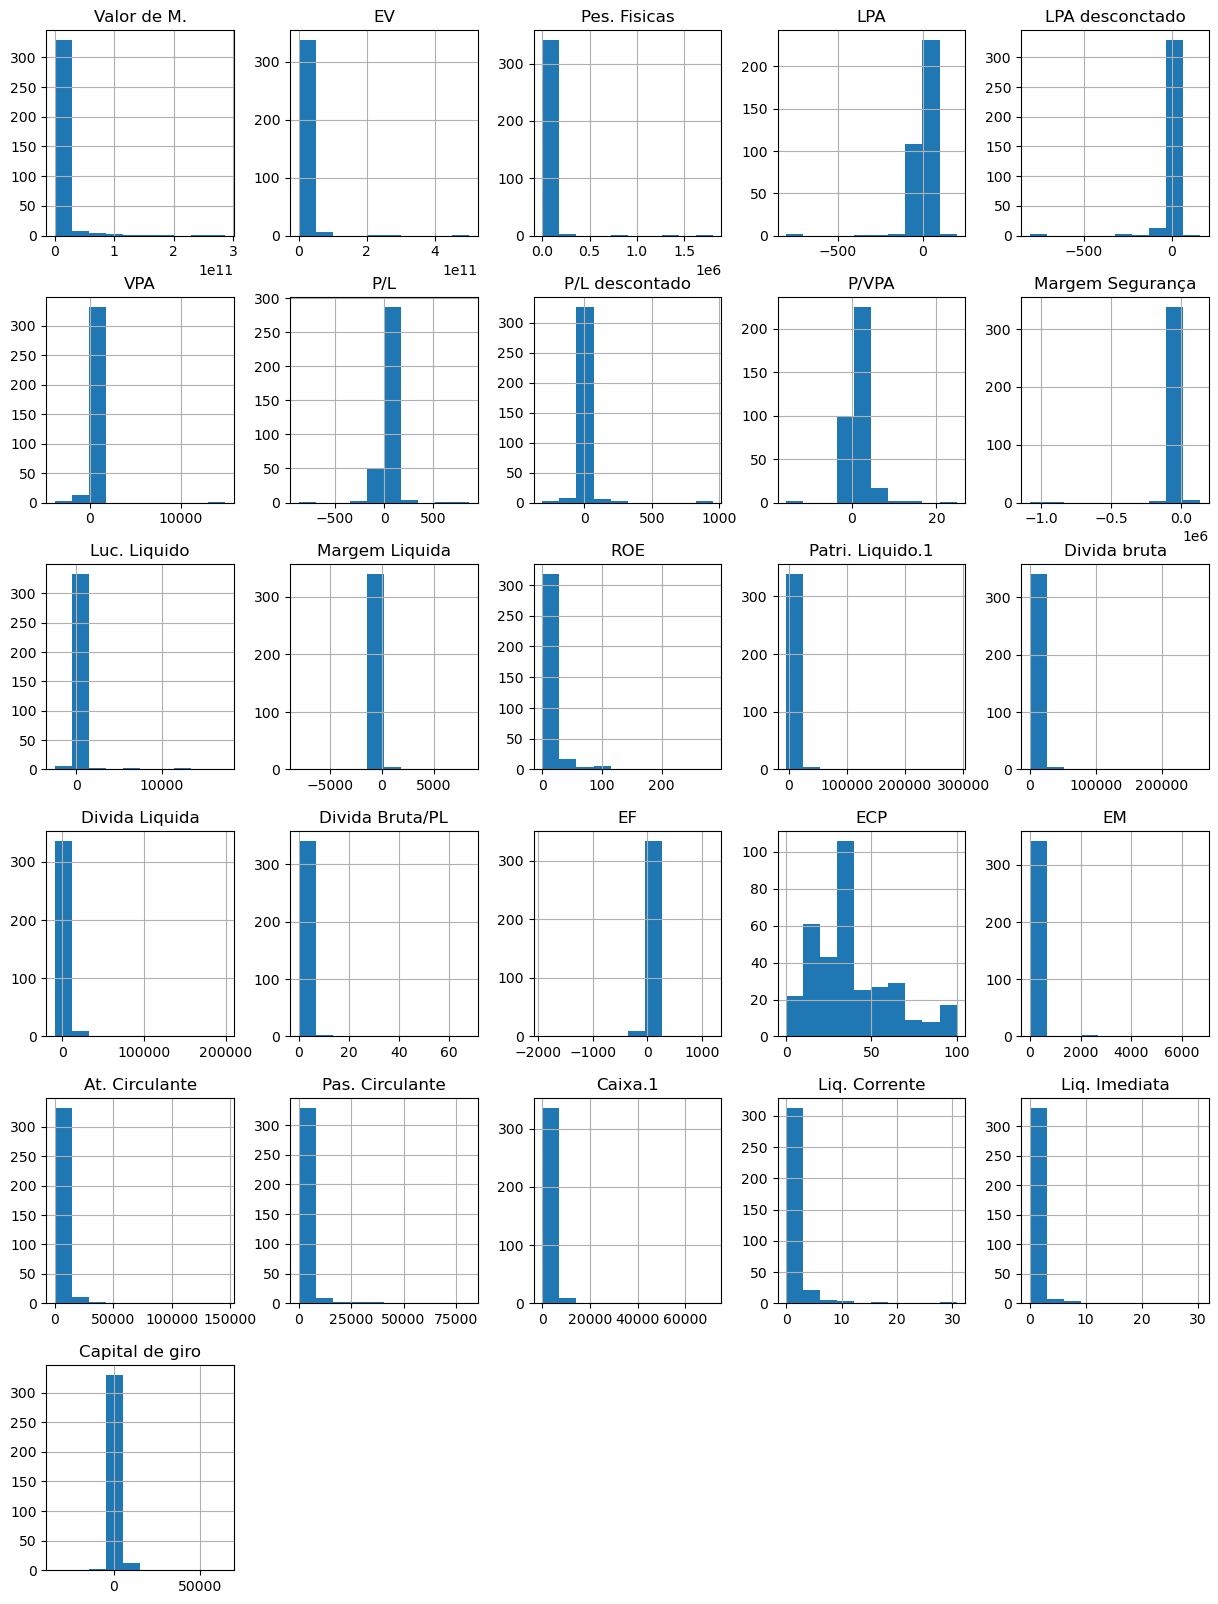

In [91]:
figura = plt.figure(figsize=(15,20))
eixo = figura.gca()
dataset.hist(ax=eixo);

## 2.4 Identifying and Eliminanting Correlated Attributes

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_5416\2729682460.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cbar=False);


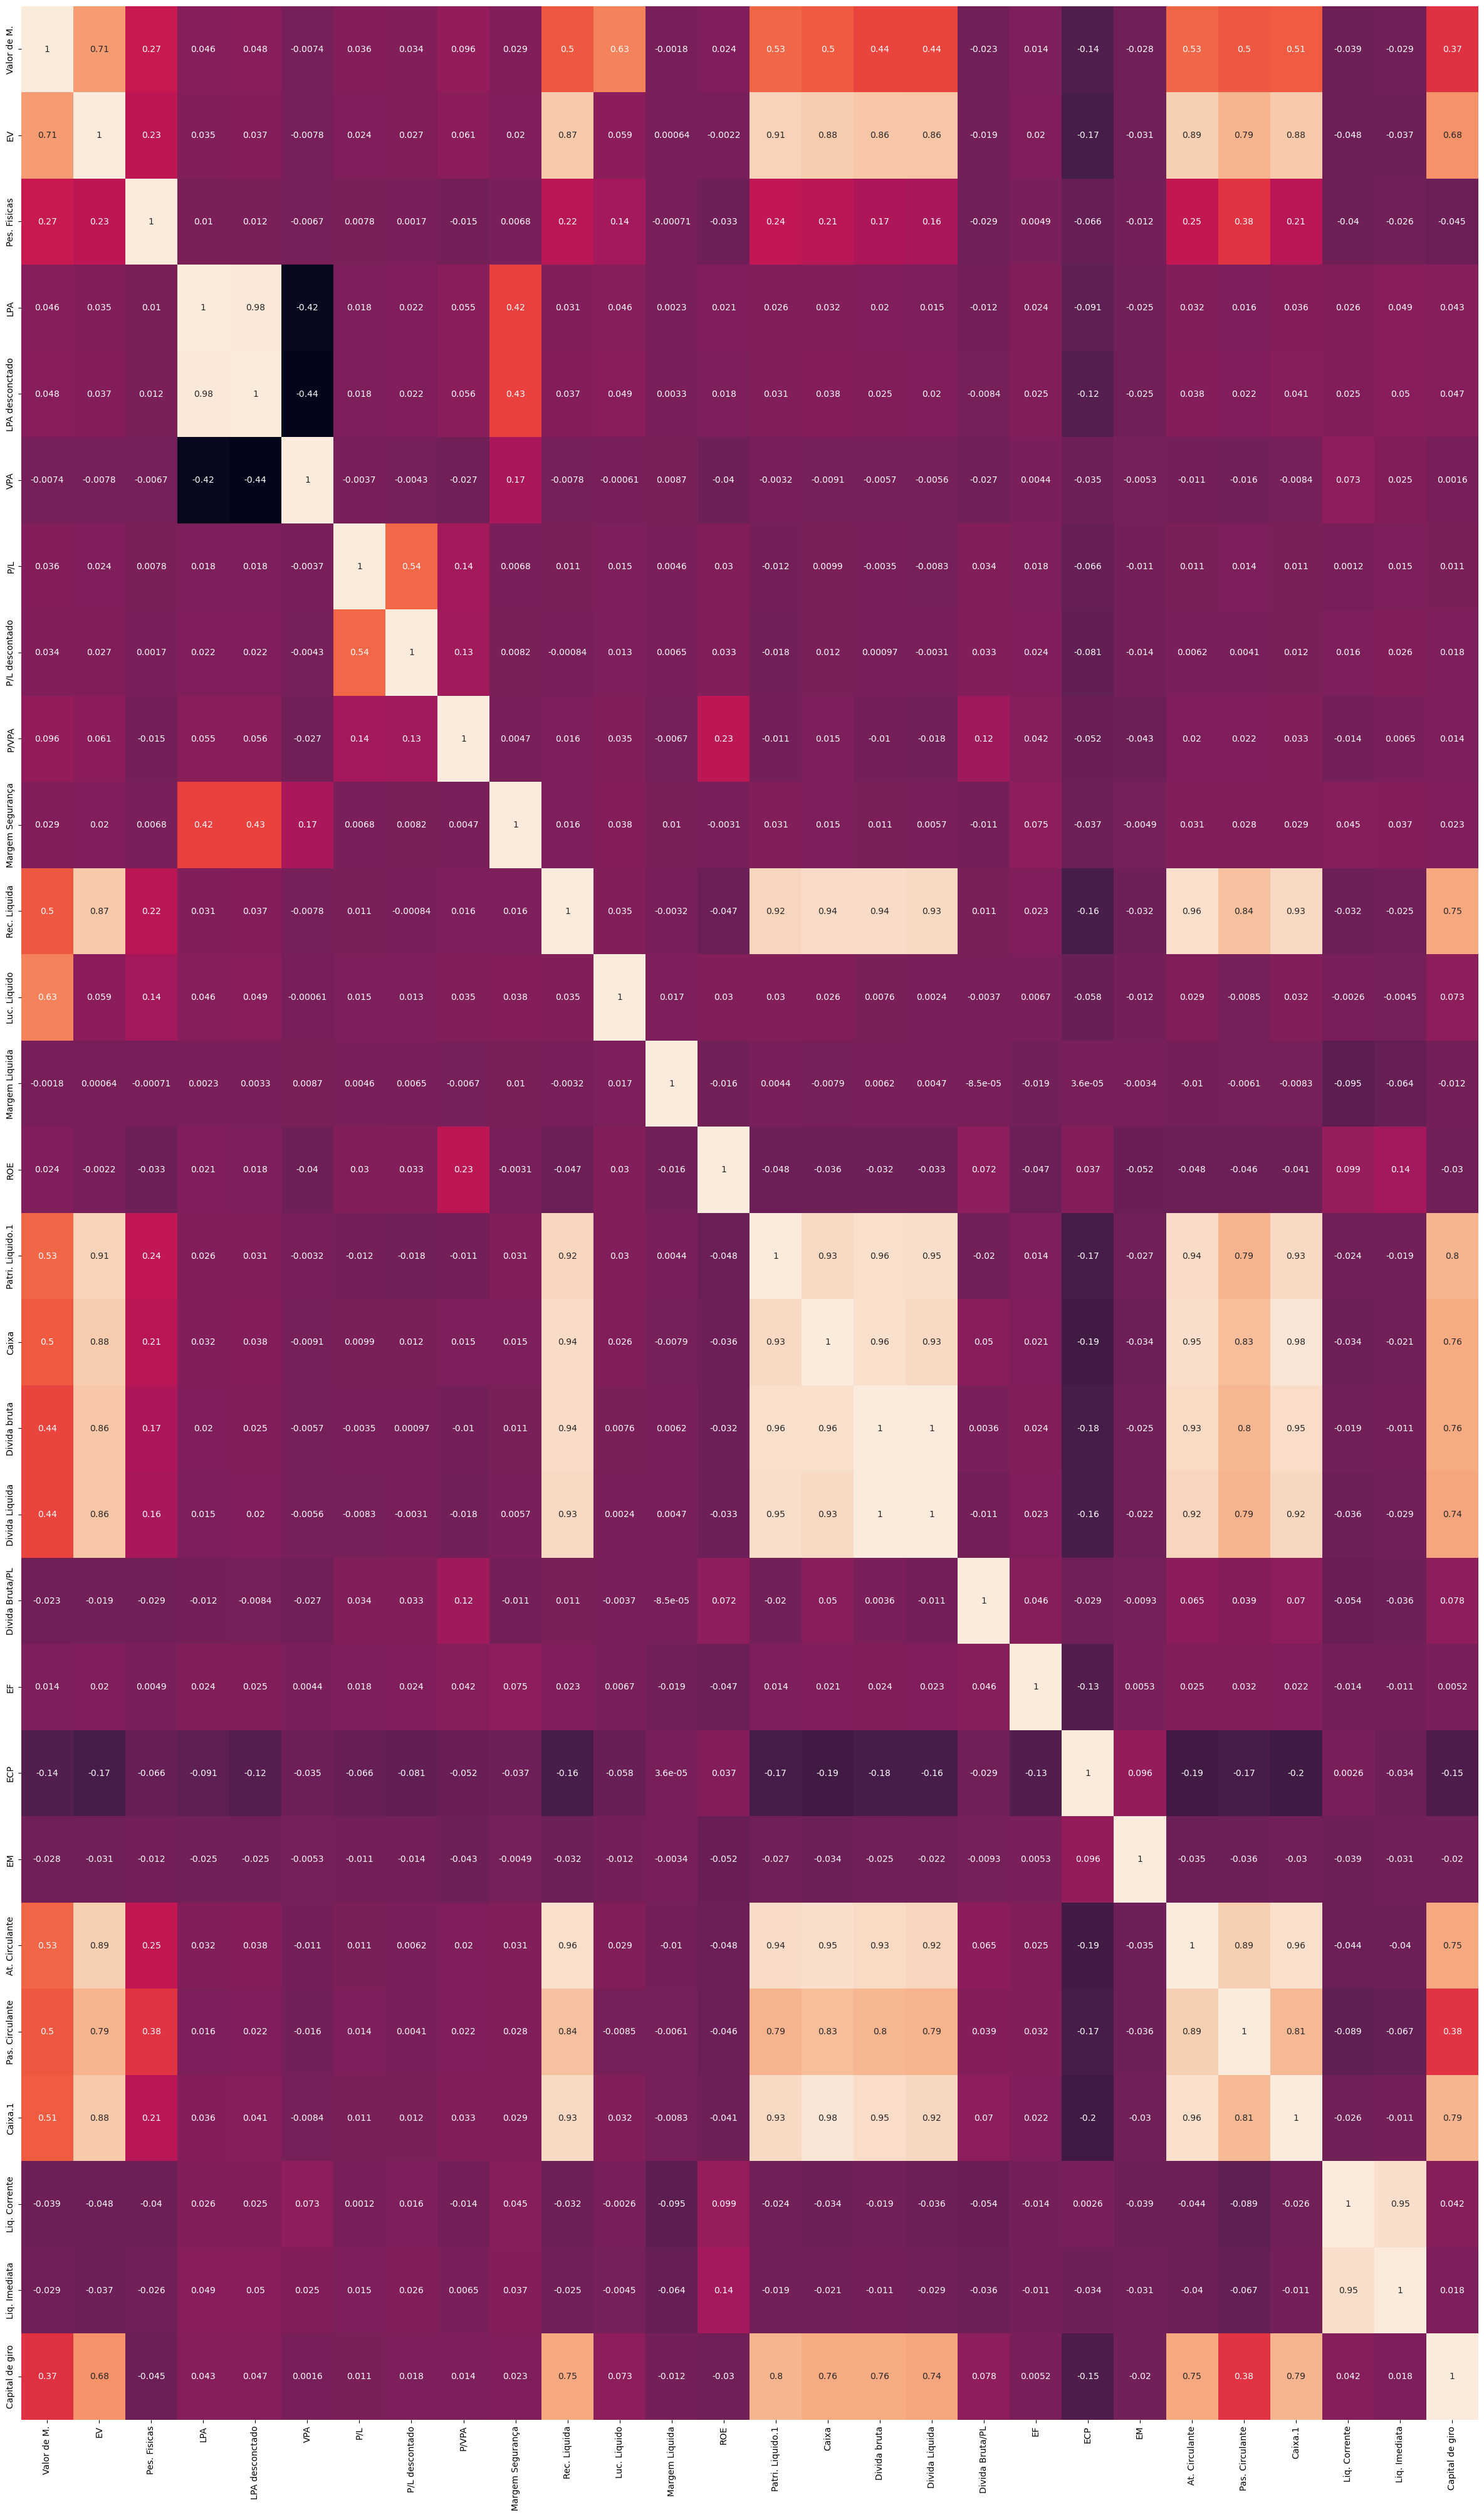

In [88]:
# Print a heatmap of the correlation between the different company attibutes
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot=True, cbar=False);

In [89]:
dataset.drop(['Rec. Liquida', 'Caixa'], axis = 1, inplace = True)

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_5416\2729682460.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cbar=False);


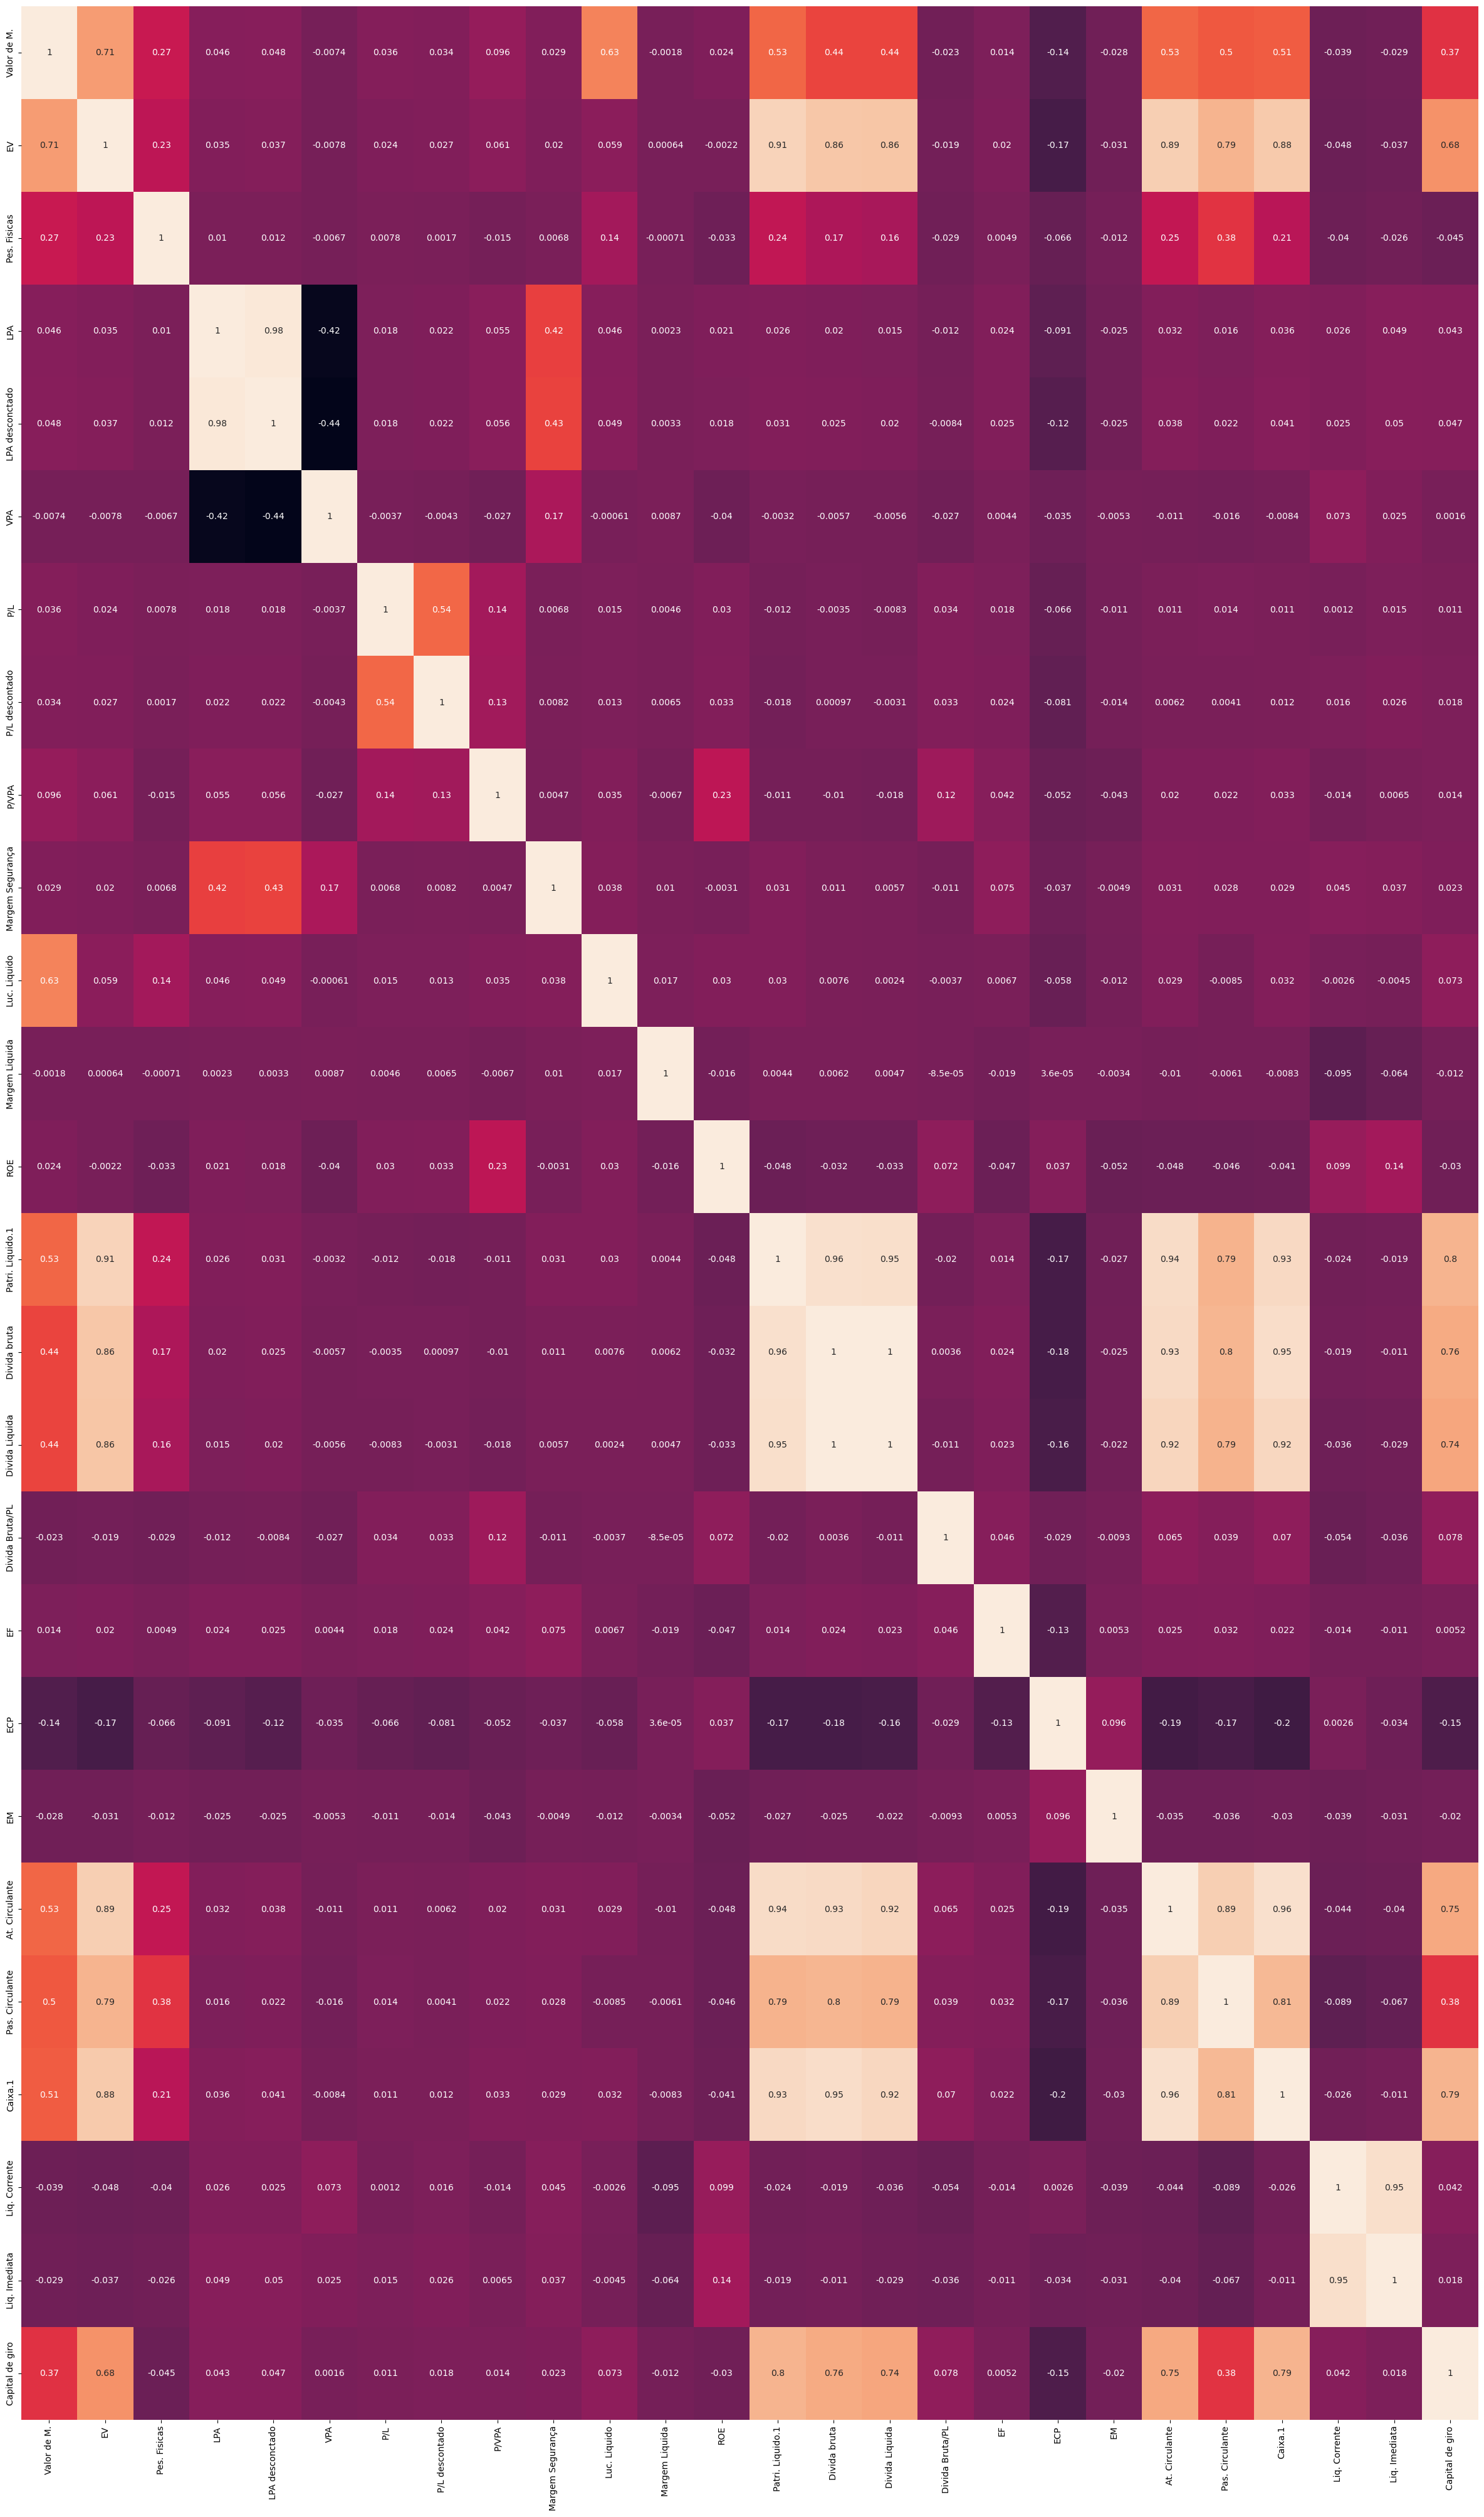

In [90]:
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot=True, cbar=False);

In [92]:
dataset.drop(['At. Circulante', 'Liq. Corrente'], axis = 1, inplace = True)

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_5416\2729682460.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cbar=False);


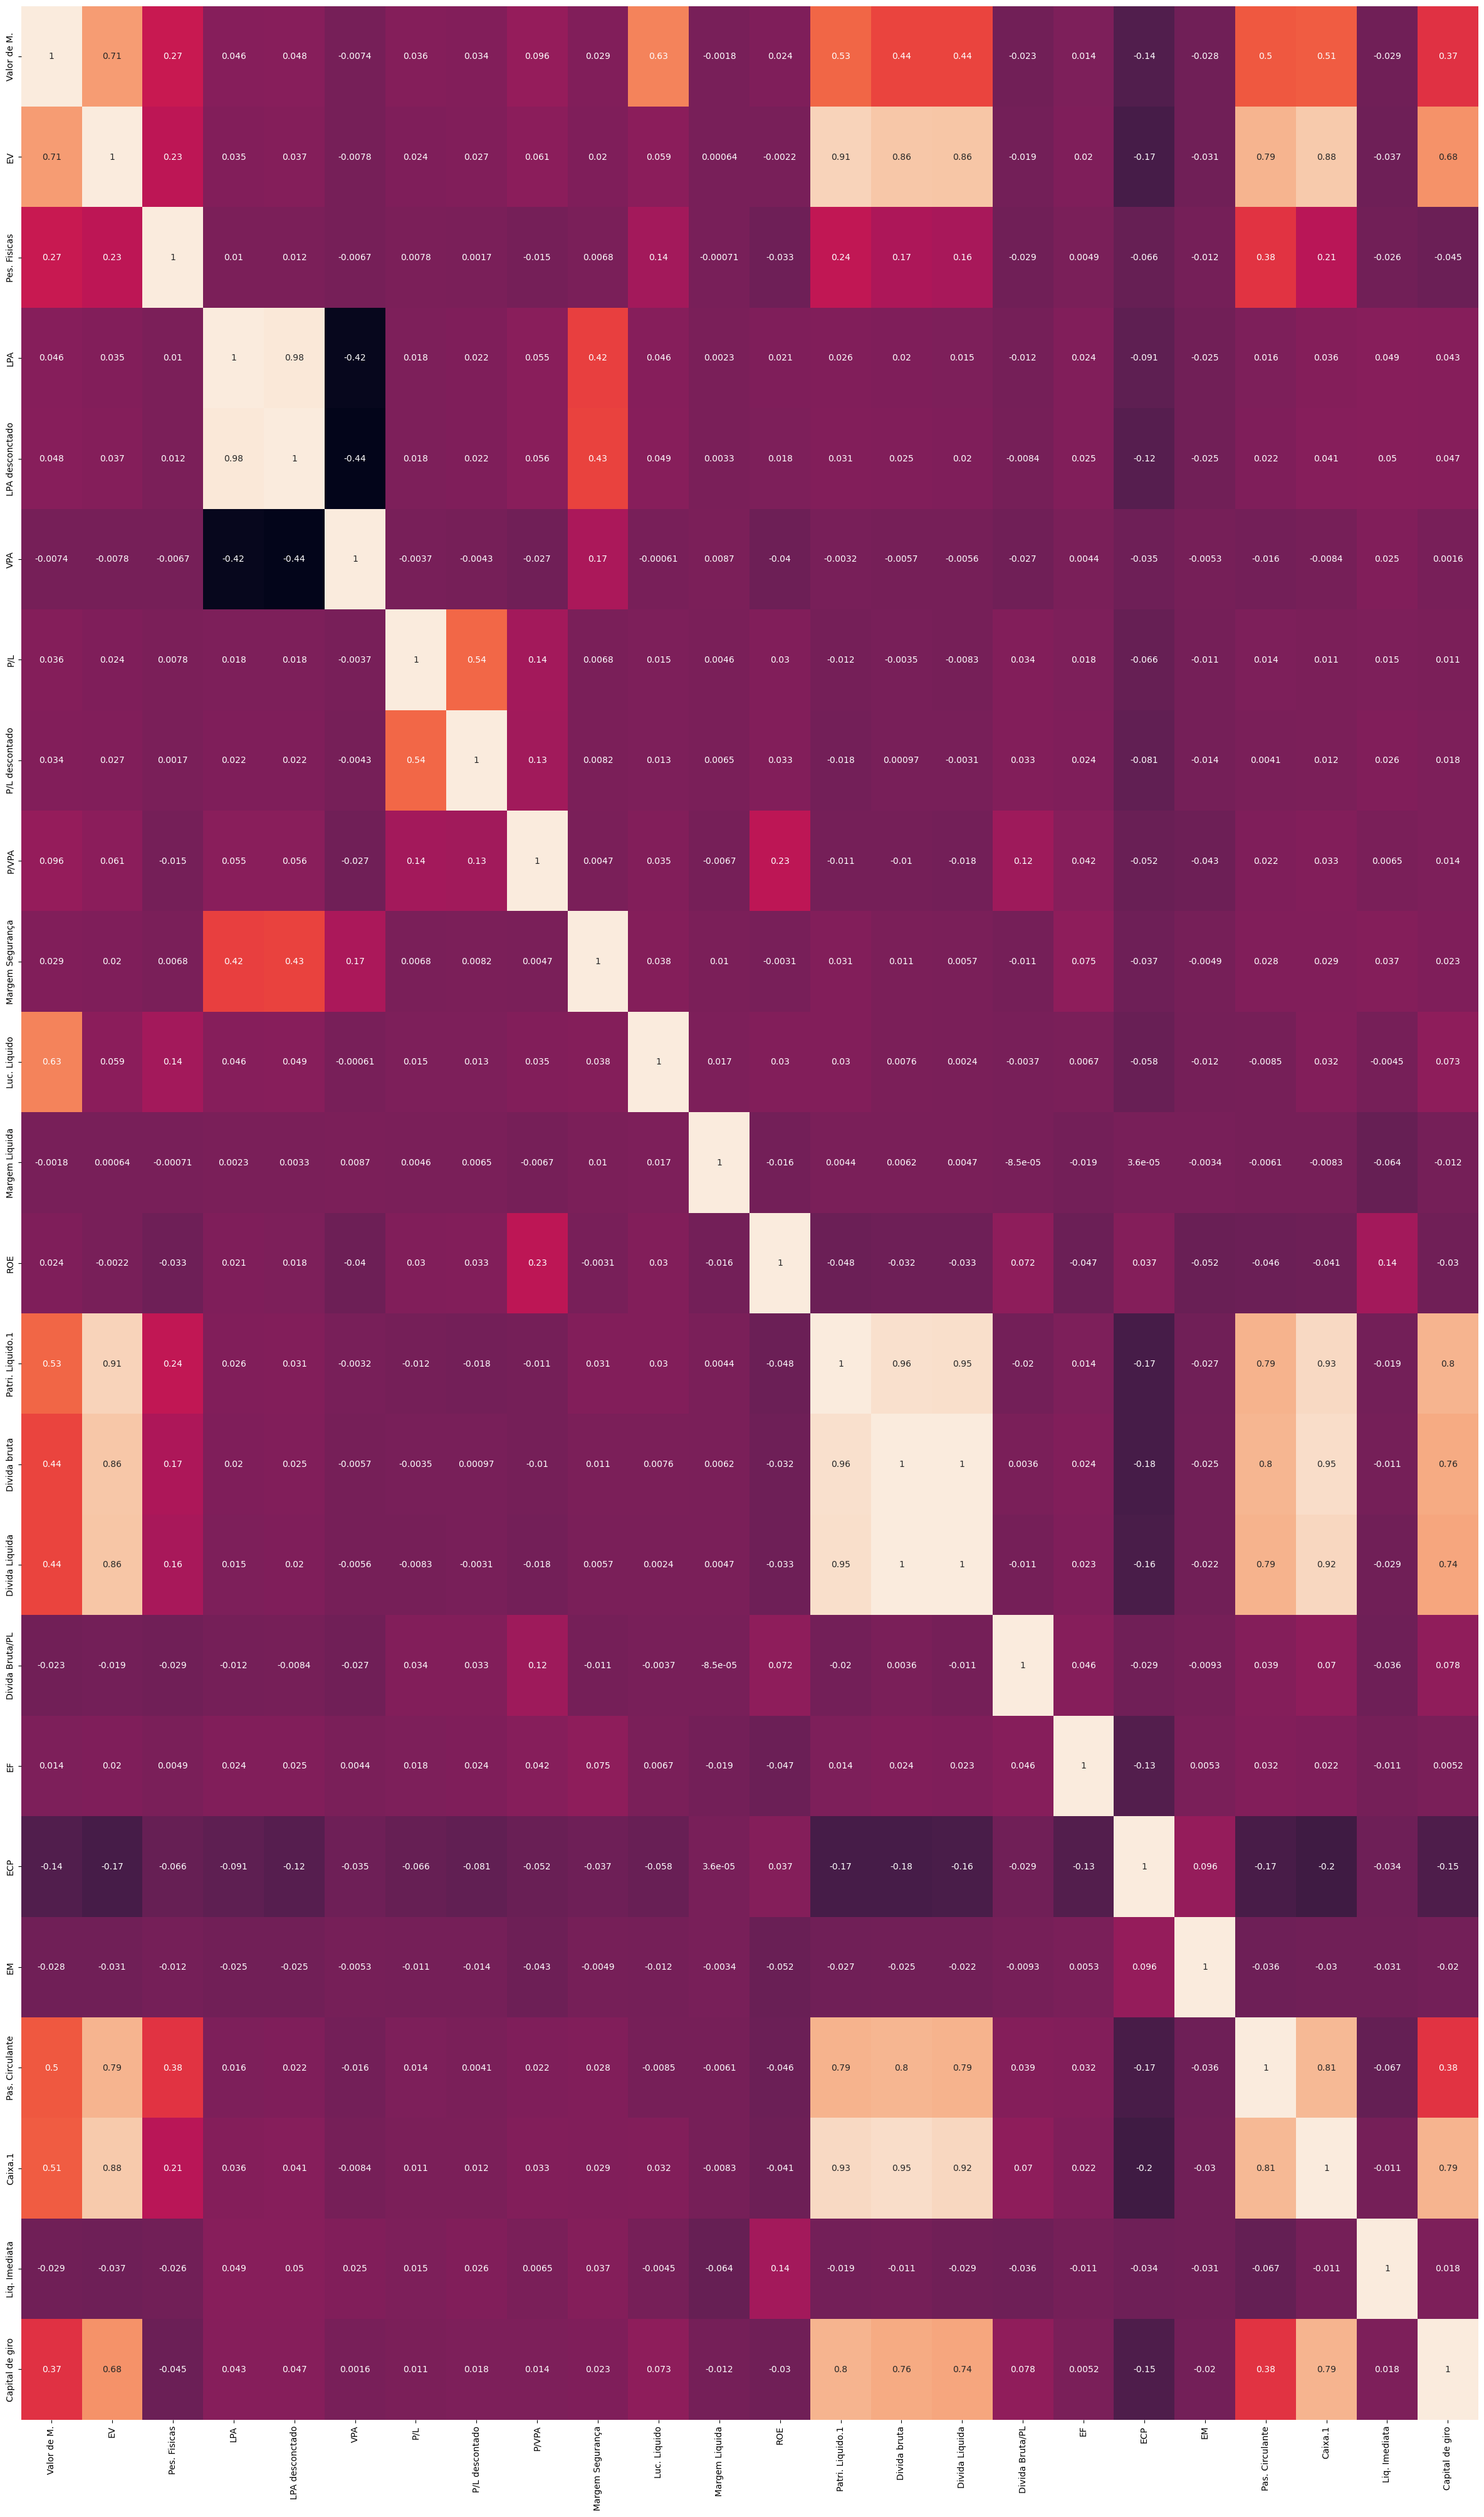

In [93]:
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot=True, cbar=False);

## 2.5 Setting Dummy Variables

In [94]:
dataset.head(1)

Situação        Empresa          Segmento   Valor de M.            EV  \
0     ruim  aes elpa s.a   energia eletrica  1.334627e+09  4.391657e+09   

   Pes. Fisicas Categoria   LPA  LPA desconctado    VPA    P/L  \
0       15969.0    alerta  0.57             0.56  36.03  24.71   

   P/L descontado  P/VPA  Margem Segurança  Luc. Liquido  Margem Liquida  \
0           24.71   0.38             -0.53         555.0          0.0648   

     ROE  Patri. Liquido.1  Divida bruta  Divida Liquida  Divida Bruta/PL  \
0  20.66            2012.0        2721.0          1567.0             0.86   

     EF   ECP    EM  Pas. Circulante  Caixa.1  Liq. Imediata  Capital de giro  
0  49.0  11.0  3.94           4508.0    545.0           0.12            102.0

In [95]:
y = dataset['Situação'].values
y

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

In [96]:
empresa = dataset['Empresa']
empresa

0                                          aes elpa s.a 
1                                         tiet aes tiete
2                                          aflu afluente
3                                        aflu afluente t
4                                      rpad alfa holding
5                                          alsc aliansce
6      all america latina logistica malha norte s.a frrn
7                                       adhm advanced dh
8                                        alpa alpargatas
9                                       cbee ampla energ
10                                           cant agpart
11                                        arzz arezzo co
12                                          azev azevedo
13                                        abev ambev s.a
14                                          atom atompar
15                                          artr arteris
16                                           alup alupar
19                            b

In [97]:
X_cat = dataset[['Segmento', 'Categoria']]
X_cat

Segmento                 Categoria
0                              energia eletrica                    alerta
1                              energia eletrica                dividendos
2                              energia eletrica                    alerta
3                              energia eletrica                    alerta
4                                        bancos      crescimento moderado
5                         exploração de imoveis                    alerta
6                        transporte ferroviario                    alerta
7                       produtos de uso pessoal                    alerta
8                                      calçados      crescimento moderado
9                              energia eletrica                    alerta
10                      holdings diversificadas                    alerta
11               tecidos, vestuarios e calçados                dividendos
12                            construção pesada                    alerta
13                     cervejas e refrigerantes      crescimento moderado
14                                       outros                    alerta
15                       exploração de rodovias                    alerta
16                             energia eletrica      crescimento moderado
19                            produtos diversos                    alerta
20                      holdings diversificadas                    alerta
21                                       bancos               crescimento
22                    máq. E equip. industriais                    alerta
23                      holdings diversificadas                    alerta
24                                 equipamentos               crescimento
25                                       bancos      crescimento moderado
26                                       bancos                    alerta
27                                       bancos                    alerta
28                                       bancos      crescimento moderado
29                                       bancos      crescimento moderado
30                                       bancos      crescimento moderado
31                                       bancos                dividendos
32                                       bancos      crescimento moderado
33                                       bancos                    alerta
34                                       bancos                    alerta
35                                       bancos                    alerta
36                                       bancos                    alerta
37                                       bancos                dividendos
38                                       bancos                    alerta
39                                       bancos               crescimento
40                                       bancos                dividendos
41                                       bancos                dividendos
42                                       bancos                dividendos
43                                   bicicletas                dividendos
44               medicamentos e outros produtos                    alerta
45                serviços financeiros diversos      crescimento moderado
46                          produtos de limpeza                    alerta
47                        exploração de imoveis                    alerta
48                        exploração de imoveis                    alerta
49                           minerais metalicos                    alerta
50                    intermediação imobiliaria                    alerta
51                        corretoras de seguros                    alerta
52                                  agricultura                    alerta
53                                petroquimicos                    alerta
54               medicamentos e outros produtos                    alerta
55                                       ba

In [98]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [99]:
X_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.])

In [100]:
X_cat.shape

(347, 90)

In [101]:
type(X_cat)

numpy.ndarray

In [102]:
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [103]:
dataset_bkp = dataset.copy()

In [104]:
dataset.head(2)

Situação         Empresa          Segmento   Valor de M.            EV  \
0     ruim   aes elpa s.a   energia eletrica  1.334627e+09  4.391657e+09   
1      boa  tiet aes tiete  energia eletrica  1.519060e+10  1.021776e+10   

   Pes. Fisicas   Categoria   LPA  LPA desconctado    VPA    P/L  \
0       15969.0      alerta  0.57             0.56  36.03  24.71   
1       18681.0  dividendos  0.18             0.18   0.80  14.92   

   P/L descontado  P/VPA  Margem Segurança  Luc. Liquido  Margem Liquida  \
0           24.71   0.38             -0.53         555.0          0.0648   
1           14.92   3.39             22.00         703.0         34.6900   

     ROE  Patri. Liquido.1  Divida bruta  Divida Liquida  Divida Bruta/PL  \
0  20.66            2012.0        2721.0          1567.0             0.86   
1  37.00            1812.0        2997.0          2459.0             1.72   

     EF   ECP    EM  Pas. Circulante  Caixa.1  Liq. Imediata  Capital de giro  
0  49.0  11.0  3.94           4508.0    545.0           0.12            102.0  
1  58.0  15.0  2.40            828.0    583.0           0.70            -52.0

In [105]:
dataset.drop(['Segmento', 'Categoria', 'Situação', 'Empresa'], axis = 1, inplace = True)

In [106]:
dataset.head(2)

Valor de M.            EV  Pes. Fisicas   LPA  LPA desconctado    VPA  \
0  1.334627e+09  4.391657e+09       15969.0  0.57             0.56  36.03   
1  1.519060e+10  1.021776e+10       18681.0  0.18             0.18   0.80   

     P/L  P/L descontado  P/VPA  Margem Segurança  Luc. Liquido  \
0  24.71           24.71   0.38             -0.53         555.0   
1  14.92           14.92   3.39             22.00         703.0   

   Margem Liquida    ROE  Patri. Liquido.1  Divida bruta  Divida Liquida  \
0          0.0648  20.66            2012.0        2721.0          1567.0   
1         34.6900  37.00            1812.0        2997.0          2459.0   

   Divida Bruta/PL    EF   ECP    EM  Pas. Circulante  Caixa.1  Liq. Imediata  \
0             0.86  49.0  11.0  3.94           4508.0    545.0           0.12   
1             1.72  58.0  15.0  2.40            828.0    583.0           0.70   

   Capital de giro  
0            102.0  
1            -52.0

In [107]:
dataset.shape

(347, 24)

In [108]:
dataset.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            366, 367, 369, 370, 371, 372, 373, 374, 375, 376],
           dtype='int64', length=347)

In [109]:
X_cat.index

RangeIndex(start=0, stop=347, step=1)

In [110]:
dataset.index = X_cat.index

In [111]:
dataset.index, X_cat.index

(RangeIndex(start=0, stop=347, step=1), RangeIndex(start=0, stop=347, step=1))

In [112]:
dataset = pd.concat([dataset, X_cat], axis = 1)
dataset

Valor de M.            EV  Pes. Fisicas         LPA  LPA desconctado  \
0    1.334627e+09  4.391657e+09  1.596900e+04    0.570000         0.560000   
1    1.519060e+10  1.021776e+10  1.868100e+04    0.180000         0.180000   
2    9.465319e+07  8.565319e+07  1.898000e+03    0.160000         0.150000   
3    2.819886e+08  2.439886e+08  8.000000e+00    0.210000         0.200000   
4    2.887665e+08  2.857665e+08  1.129000e+04    0.600000         0.600000   
5    3.122133e+09  4.530133e+09  4.060000e+02   -0.050000        -0.040000   
6    8.596999e+09  1.021776e+10  1.000000e+00    0.440000        -8.723009   
7    2.178028e+07  2.178028e+07  6.050000e+02   -1.980000        -1.980000   
8    5.330196e+09  5.421196e+09  5.974000e+03    0.760000         0.760000   
9    4.510893e+09  7.434893e+09  5.960000e+02    2.250000         2.250000   
10   8.596999e+09  1.021776e+10  5.000000e+00    0.440000        -8.723009   
11   2.787681e+09  2.654681e+09  8.890000e+02    1.310000         1.300000   
12   4.914000e+07  5.414000e+07  1.980000e+02    0.040000         0.030000   
13   2.866893e+11  2.839263e+11  4.875600e+04    0.830000         0.750000   
14   1.067939e+08  1.067939e+08  1.946000e+03   -7.560357        -8.723009   
15   5.754538e+09  1.087754e+10  1.334000e+03    0.350000         0.350000   
16   6.471692e+09  1.021776e+10  4.447000e+03    0.920000         0.910000   
17   4.112987e+09  6.411987e+09  3.231000e+03   -1.420000        -1.410000   
18   2.830095e+07  1.699050e+06  6.640000e+02    3.310000         3.310000   
19   1.194151e+09  1.021776e+10  1.798000e+03    0.510000         0.500000   
20   6.160000e+07  2.400000e+08  5.460000e+02  -63.130000       -63.120000   
21   1.305530e+08  1.385530e+08  4.650000e+02    0.130000         0.130000   
22   8.065400e+07  9.865400e+07  2.110000e+02    1.530000         1.530000   
23   3.273495e+09  1.021776e+10  2.255000e+03    2.140000         2.140000   
24   5.015685e+08  1.021776e+10  1.629600e+04    1.030000         1.030000   
25   8.680339e+08  1.021776e+10  1.484600e+04    4.420000         4.410000   
26   1.707177e+11  1.021776e+10  3.270980e+05    2.720000         2.710000   
27   9.225239e+10  1.021776e+10  3.339630e+05    2.770000         2.460000   
28   8.596999e+09  1.021776e+10  4.580000e+02    1.690000         1.680000   
29   3.749433e+08  1.021776e+10  2.604000e+03    4.320000         4.310000   
30   8.596999e+09  1.021776e+10  4.600000e+02   14.800000        -8.723009   
31   7.582387e+09  1.021776e+10  5.928400e+04    1.610000         1.610000   
32   2.181140e+08  1.021776e+10  3.660000e+02   -0.750000        -0.740000   
33   1.149876e+08  1.021776e+10  1.395000e+03    0.070000         0.070000   
34   2.235850e+08  1.021776e+10  6.362000e+03    2.260000         2.250000   
35   2.423583e+09  1.021776e+10  8.352000e+03    8.480000         8.470000   
36   1.904532e+09  1.021776e+10  2.065000e+03   -0.260000        -0.250000   
37   8.596999e+09  1.021776e+10  1.946000e+03   -7.560357        -8.723009   
38   4.241021e+08  1.021776e+10  1.567000e+03   -0.120000        -0.110000   
39   9.385785e+10  1.021776e+10  1.523890e+05    0.990000         0.980000   
40   6.060887e+08  1.021776e+10  4.500000e+02    0.340000         0.340000   
41   1.376074e+08  2.392650e+06  4.000000e+02   24.190000        24.180000   
42   2.157912e+08  1.837912e+08  4.700000e+02    0.260000         0.250000   
43   4.048266e+10  3.465666e+10  4.341600e+04    0.700000         1.160000   
44   1.243486e+08  2.693486e+08  2.116000e+03    1.090000         1.090000   
45   9.045416e+09  1.341342e+10  3.213000e+03    0.350000         0.340000   
46   2.755631e+09  5.151631e+09  2.336000e+03    0.100000         0.100000   
47   6.204476e+09  5.960470e+09  7.186300e+04    1.800000         1.790000   
48   3.143286e+08  2.883286e+08  5.700000e+02   -0.660000        -0.660000   
49   1.570446e+08  1.040446e+08  9.760000e+02  -12.260000       -12.250000   
50   7.253337e+08  8.213337e

## 2.6 Normalizing the Dataset

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Columns: 114 entries, Valor de M. to 89
dtypes: float64(114)
memory usage: 309.2 KB


In [119]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
scaler = MinMaxScaler()

In [125]:
dataset = dataset.rename(str,axis="columns") 

In [126]:
dataset_normalizado = scaler.fit_transform(dataset)

In [127]:
dataset_normalizado

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [128]:
dataset_normalizado[0]

array([4.65507421e-03, 8.83755803e-03, 8.85280057e-03, 8.01365987e-01,
       8.34387662e-01, 2.05380580e-01, 5.15880181e-01, 2.66367295e-01,
       3.95936571e-01, 8.89262572e-01, 1.53146818e-01, 4.87787134e-01,
       7.23820201e-02, 2.22420717e-02, 1.05274154e-02, 5.02049230e-02,
       1.26470588e-02, 6.31697145e-01, 1.10000000e-01, 4.35870506e-04,
       5.55281768e-02, 7.60493414e-03, 3.93442623e-03, 3.45650017e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [129]:
X = dataset_normalizado.copy()
X

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [130]:
X.shape

(347, 114)

In [131]:
y

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

In [132]:
y.shape

(347,)

[Summary](#Summary)

# 3. Applying the Machine Learning Algorithms to Classify the Companies <a id='ApplyingMLAlg'></a>

## 3.1 Applying RandomForestClassifier and MLPClassifier

In [143]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [144]:
resultados_forest = []
type(resultados_forest)

list

In [145]:
resultados_neural = []
type(resultados_neural)

list

In [147]:
resultados_forest_list = []
resultados_neural_list = []
for i in range(10):
    kfold = KFold(n_splits=30, shuffle=True, random_state=i)

    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv = kfold)
    resultados_forest_list.append(scores.mean())

    network = MLPClassifier(hidden_layer_sizes=(175, 175))
    scores = cross_val_score(network, X, y, cv = kfold)
    resultados_neural_list.append(scores.mean())

    resultados_forest = np.array(resultados_forest_list)
    resultados_neural = np.array(resultados_neural_list)

C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Cleiber\anaconda3\lib\site-packages\sklearn\neural_netw

In [149]:
resultados_forest

array([0.64040404, 0.6520202 , 0.6469697 , 0.63838384, 0.6479798 ,
       0.63383838, 0.62929293, 0.65252525, 0.64722222, 0.64343434])

In [150]:
resultados_neural

array([0.55176768, 0.5489899 , 0.55328283, 0.54545455, 0.54873737,
       0.53787879, 0.52171717, 0.53636364, 0.54949495, 0.55656566])

In [151]:
resultados_forest.mean(), resultados_neural.mean()

(0.6432070707070707, 0.5450252525252525)

## 3.2 Training and Testing the Model

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2)

In [155]:
X_treinamento.shape, y_treinamento.shape

((277, 114), (277,))

In [156]:
X_teste.shape, y_teste.shape

((70, 114), (70,))

### 3.2.1 Applying RandomForrestClassifier

In [157]:
random_forest = RandomForestClassifier()
random_forest.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [158]:
previsoes = random_forest.predict(X_teste)

In [159]:
previsoes

array(['medio', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'boa', 'medio',
       'ruim', 'medio', 'ruim', 'medio', 'ruim', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'boa', 'boa',
       'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'medio', 'boa',
       'ruim', 'boa', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'boa', 'boa', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'ruim', 'ruim', 'boa', 'boa', 'ruim', 'medio', 'ruim',
       'ruim', 'boa', 'ruim', 'medio', 'ruim'], dtype=object)

In [161]:
y_teste

array(['boa', 'ruim', 'ruim', 'ruim', 'ruim', 'boa', 'medio', 'medio',
       'ruim', 'boa', 'boa', 'boa', 'medio', 'ruim', 'boa', 'ruim',
       'ruim', 'boa', 'boa', 'boa', 'medio', 'boa', 'ruim', 'boa',
       'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim', 'ruim', 'medio',
       'boa', 'ruim', 'boa', 'boa', 'boa', 'ruim', 'ruim', 'boa', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'boa', 'ruim', 'boa', 'boa', 'ruim', 'ruim',
       'medio', 'ruim', 'medio', 'medio', 'ruim', 'ruim', 'medio',
       'medio', 'medio', 'boa', 'ruim', 'ruim', 'ruim'], dtype=object)

### 3.2.2 Evalutating the Model

In [162]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [163]:
accuracy_score(y_teste, previsoes)

0.6

In [164]:
cm = confusion_matrix(y_teste, previsoes)
cm

array([[11,  5,  7],
       [ 3,  3,  7],
       [ 4,  2, 28]], dtype=int64)

In [165]:
(11 + 3 + 28) / 70

0.6

In [166]:
random_forest.classes_

array(['boa', 'medio', 'ruim'], dtype=object)

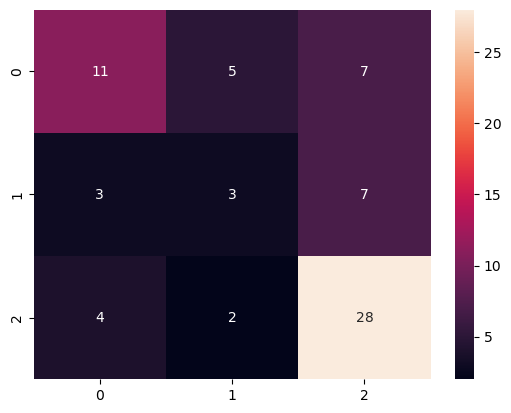

In [167]:
sns.heatmap(cm, annot=True);

In [168]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         boa       0.61      0.48      0.54        23
       medio       0.30      0.23      0.26        13
        ruim       0.67      0.82      0.74        34

    accuracy                           0.60        70
   macro avg       0.53      0.51      0.51        70
weighted avg       0.58      0.60      0.58        70



In [169]:
X_teste[0].shape

(114,)

In [170]:
X_teste[0].reshape(1, -1)

array([[1.63580483e-03, 6.38672096e-04, 5.13937007e-04, 8.05972224e-01,
        8.39194162e-01, 2.05575753e-01, 5.05625195e-01, 2.52357950e-01,
        4.09068385e-01, 8.89315722e-01, 1.26073635e-01, 4.88047766e-01,
        1.40139439e-02, 1.71963534e-02, 6.57721652e-05, 4.17149145e-02,
        4.41176471e-04, 6.16939365e-01, 7.00000000e-01, 4.76036048e-05,
        9.11711801e-04, 2.45590534e-03, 7.70491803e-02, 3.47077403e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [172]:
random_forest.feature_importances_

array([4.86024566e-02, 3.58687728e-02, 4.43446736e-02, 4.24589383e-02,
       5.70974637e-02, 4.72331727e-02, 3.60558742e-02, 3.84288423e-02,
       5.52223785e-02, 3.20137813e-02, 5.15682674e-02, 2.82106455e-02,
       3.11629901e-02, 4.35678875e-02, 3.19501925e-02, 3.05480363e-02,
       2.80445053e-02, 2.37360205e-02, 2.43921976e-02, 3.09617832e-02,
       3.09589899e-02, 3.74052446e-02, 2.36903013e-02, 3.18750377e-02,
       1.58010422e-04, 3.52621540e-03, 5.39133817e-05, 1.15029812e-03,
       8.86782063e-04, 0.00000000e+00, 4.73863826e-04, 7.04876779e-04,
       2.45019729e-04, 3.10140303e-04, 2.51597657e-03, 0.00000000e+00,
       1.19974538e-04, 6.51935705e-05, 5.16808313e-04, 6.27654355e-04,
       1.05346827e-05, 2.69056118e-05, 2.00929189e-04, 9.42484621e-06,
       8.25619602e-07, 2.94411992e-04, 1.15290250e-04, 2.68963820e-03,
       7.34461140e-04, 1.32848177e-03, 5.92231635e-03, 0.00000000e+00,
       3.35694796e-05, 6.31524189e-05, 2.29394603e-04, 1.62382507e-03,
      

In [173]:
np.argmax(random_forest.feature_importances_)

4

In [174]:
for nome, importancia in zip(dataset.columns, random_forest.feature_importances_):
    print(nome, ' = ', importancia)

Valor de M.  =  0.04860245655500693
EV  =  0.03586877284495999
Pes. Fisicas  =  0.044344673605878994
LPA  =  0.04245893830100871
LPA desconctado  =  0.05709746365993627
VPA  =  0.04723317270800982
P/L  =  0.03605587415578783
P/L descontado  =  0.03842884227038565
P/VPA  =  0.055222378450360335
Margem Segurança  =  0.03201378128065461
Luc. Liquido  =  0.05156826740125501
Margem Liquida  =  0.02821064546978393
ROE  =  0.03116299006546078
Patri. Liquido.1  =  0.04356788753752604
Divida bruta  =  0.03195019247687023
Divida Liquida  =  0.03054803627215984
Divida Bruta/PL  =  0.028044505277635533
EF  =  0.02373602047055266
ECP  =  0.024392197593416137
EM  =  0.030961783209770027
Pas. Circulante  =  0.03095898993800241
Caixa.1  =  0.03740524455954516
Liq. Imediata  =  0.023690301284283677
Capital de giro  =  0.03187503768214089
0  =  0.00015801042193001023
1  =  0.0035262154030732454
2  =  5.3913381673490587e-05
3  =  0.0011502981195259058
4  =  0.0008867820625660329
5  =  0.0
6  =  0.0004738

In [175]:
caracteristicas = dataset.columns
caracteristicas

Index(['Valor de M.', 'EV', 'Pes. Fisicas', 'LPA', 'LPA desconctado', 'VPA',
       'P/L', 'P/L descontado', 'P/VPA', 'Margem Segurança',
       ...
       '80', '81', '82', '83', '84', '85', '86', '87', '88', '89'],
      dtype='object', length=114)

In [176]:
importancias = random_forest.feature_importances_
importancias

array([4.86024566e-02, 3.58687728e-02, 4.43446736e-02, 4.24589383e-02,
       5.70974637e-02, 4.72331727e-02, 3.60558742e-02, 3.84288423e-02,
       5.52223785e-02, 3.20137813e-02, 5.15682674e-02, 2.82106455e-02,
       3.11629901e-02, 4.35678875e-02, 3.19501925e-02, 3.05480363e-02,
       2.80445053e-02, 2.37360205e-02, 2.43921976e-02, 3.09617832e-02,
       3.09589899e-02, 3.74052446e-02, 2.36903013e-02, 3.18750377e-02,
       1.58010422e-04, 3.52621540e-03, 5.39133817e-05, 1.15029812e-03,
       8.86782063e-04, 0.00000000e+00, 4.73863826e-04, 7.04876779e-04,
       2.45019729e-04, 3.10140303e-04, 2.51597657e-03, 0.00000000e+00,
       1.19974538e-04, 6.51935705e-05, 5.16808313e-04, 6.27654355e-04,
       1.05346827e-05, 2.69056118e-05, 2.00929189e-04, 9.42484621e-06,
       8.25619602e-07, 2.94411992e-04, 1.15290250e-04, 2.68963820e-03,
       7.34461140e-04, 1.32848177e-03, 5.92231635e-03, 0.00000000e+00,
       3.35694796e-05, 6.31524189e-05, 2.29394603e-04, 1.62382507e-03,
      

In [177]:
indices = np.argsort(importancias)
indices

array([ 79, 108,  58,  29,  35,  98,  51,  77,  76,  44,  64,  84,  43,
        40,  41,  52,  26,  73,  70,  53,  37,  80,  90, 104,  46,  87,
        36,  89,  24,  65,  69,  42,  78,  54,  32,  72,  68,  45,  91,
        33, 101,  63,  57,  60, 103,  85, 107,  30,  88,  38, 102,  71,
        94,  97,  39,  93,  67,  31,  48,  99, 106,  86,  96,  28, 100,
       113,  81,  56,  27,  62,  82,  95, 105,  92,  49,  61,  55,  59,
        83, 110,  34,  66,  47,  74,  75,  25, 112,  50, 111,  22,  17,
        18,  16,  11,  15, 109,  20,  19,  12,  23,  14,   9,   1,   6,
        21,   7,   3,  13,   2,   5,   0,  10,   8,   4], dtype=int64)

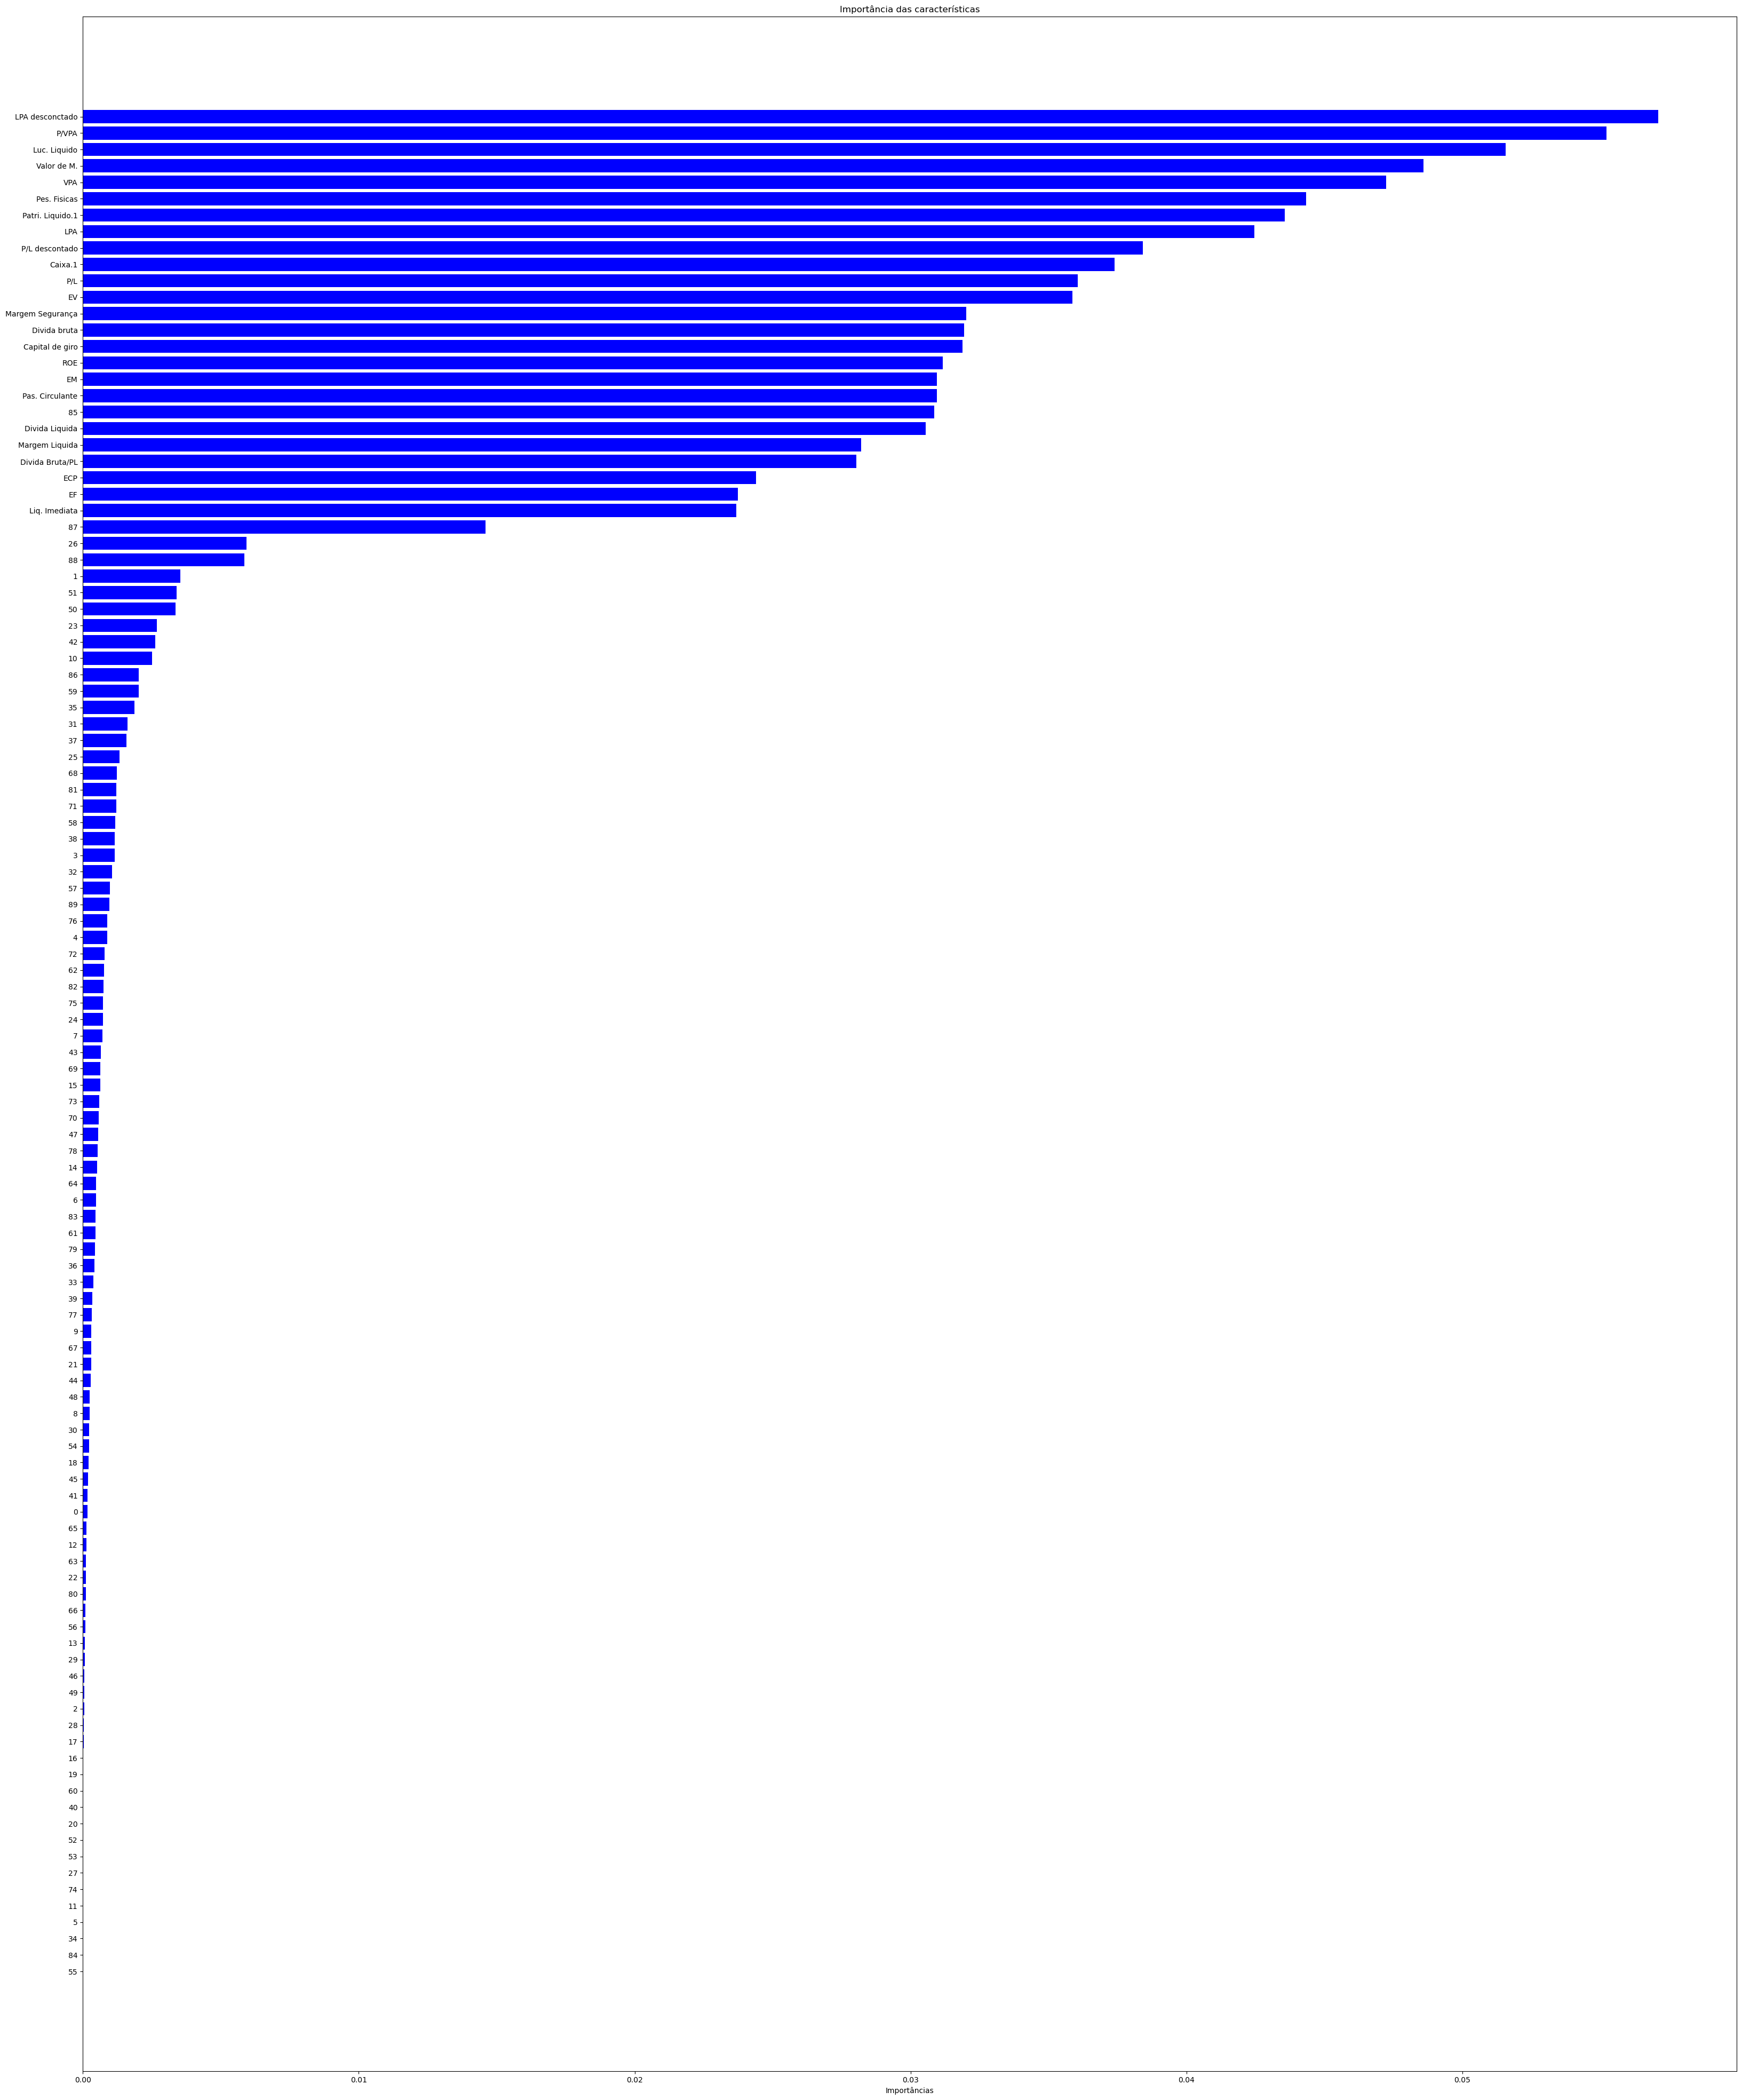

In [178]:
plt.figure(figsize=(40,50))
plt.title('Importância das características')
plt.barh(range(len(indices)), importancias[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [caracteristicas[i] for i in indices])
plt.xlabel('Importâncias')
plt.show();

## 3.3 Saving the Model

In [179]:
import pickle

In [181]:
with open('companies_classification.pkl', 'wb') as f:
    pickle.dump([dataset, dataset_bkp, X, y, empresa, scaler], f)

## 3.4 Looking for The Best Parameters

In [182]:
random_forest

RandomForestClassifier()

In [183]:
parametros = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 4, 6],
              'n_estimators': [50, 100, 150]}

In [184]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parametros)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params, best_score)

{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 150} 0.6628985507246377


[Summary](#Summary)

# 4. Clustering the Companies for Investiment <a id='ClusteringTheCompanies'></a>

## 4.1 Preparing the Dataset

In [192]:
import pickle
with open('companies_classification.pkl', 'rb') as f:
    dataset, dataset_original, X, y, empresa, scaler = pickle.load(f)

In [193]:
pd.options.display.max_rows = 10

In [194]:
dataset

Valor de M.            EV  Pes. Fisicas       LPA  LPA desconctado  \
0    1.334627e+09  4.391657e+09  15969.000000  0.570000         0.560000   
1    1.519060e+10  1.021776e+10  18681.000000  0.180000         0.180000   
2    9.465319e+07  8.565319e+07   1898.000000  0.160000         0.150000   
3    2.819886e+08  2.439886e+08      8.000000  0.210000         0.200000   
4    2.887665e+08  2.857665e+08  11290.000000  0.600000         0.600000   
..            ...           ...           ...       ...              ...   
342  5.034333e+09  4.615333e+09  30941.268156  0.210000         0.210000   
343  8.596999e+09  1.021776e+10    176.000000 -7.560357        -8.723009   
344  1.412889e+08  9.528892e+07   3604.000000 -0.520000        -0.520000   
345  8.596999e+09  1.021776e+10      2.000000 -7.560357        -8.723009   
346  8.596999e+09  1.021776e+10      1.000000 -7.560357        -8.723009   

           VPA        P/L  P/L descontado     P/VPA  Margem Segurança  \
0    36.030000  24.710000       24.710000  0.380000          -0.53000   
1     0.800000  14.920000       14.920000  3.390000          22.00000   
2     2.070000  31.550000       31.550000  2.420000         -63.00000   
3     1.230000  21.690000       21.690000  3.610000          46.00000   
4    10.420000   5.650000        5.650000  0.320000         116.00000   
..         ...        ...             ...       ...               ...   
342   1.690000  15.640000       15.640000  1.940000          26.00000   
343  37.412006  10.669968       12.338617  1.677604       -7975.95134   
344  11.610000  -7.350000       -7.350000  0.330000        -271.00000   
345  37.412006  10.669968       12.338617  1.677604       -7975.95134   
346  37.412006  10.669968       12.338617  1.677604       -7975.95134   

     Luc. Liquido  Margem Liquida        ROE  Patri. Liquido.1  Divida bruta  \
0      555.000000        0.064800  20.660000       2012.000000   2721.000000   
1      703.000000       34.690000  37.000000       1812.000000   2997.000000   
2       13.000000       38.150000  25.000000         48.000000      0.000000   
3       17.000000       56.000000  22.000000         78.000000      3.000000   
4       45.000000      157.450000   6.000000        721.000000    140.000000   
..            ...             ...        ...               ...           ...   
342    307.596923        6.180000  24.000000       2130.000000    205.000000   
343    109.000000        9.360000  11.000000       1060.000000    810.000000   
344     21.000000        2.210000   5.000000        452.000000      0.000000   
345     -8.000000       12.658474  18.404238          4.000000   3203.312693   
346    307.596923       12.658474  18.404238       3709.284884   3203.312693   

     Divida Liquida  Divida Bruta/PL         EF        ECP         EM  \
0       1567.000000         0.860000  49.000000  11.000000   3.940000   
1       2459.000000         1.720000  58.000000  15.000000   2.400000   
2         -8.000000         1.720811  30.548746  38.872065   1.240000   
3        -31.000000         0.040000   5.250000  23.000000   1.150000   
4       -440.750000         0.250000  30.548746  38.872065   1.010000   
..              ...              ...        ...        ...        ...   
342     -421.000000         0.090000  10.000000  47.000000   2.630000   
343      478.000000         0.740000  42.000000   9.000000   2.130000   
344     -135.000000         1.720811  30.548746  38.872065   1.180000   
345       -2.000000         1.720811  30.548746  38.872065  62.646871   
346     2080.015076         1.720811  30.548746  38.872065  62.646871   

     Pas. Circulante      Caixa.1  Liq. Imediata  Capital de giro    0    1  \
0        4508.000000   545.000000       0.120000       102.000000  0.0  0.0   
1         828.000000   583.000000       0.700000       -52.000000  0.0  0.0   
2           8.000000     9.000000       1.130000         4.000000  0.0  0.0   
3           7.000000    42.000000       6.000000        67.000

In [195]:
dataset_original

Situação                            Empresa  \
0       ruim                      aes elpa s.a    
1        boa                     tiet aes tiete   
2       ruim                      aflu afluente   
3       ruim                    aflu afluente t   
4       ruim                  rpad alfa holding   
..       ...                                ...   
372     ruim                 whirlpool s.a whrl   
373      boa               wilson sons ltd wson   
374     ruim  wlm industria e comercia s.a sgas   
375     ruim        zain participações s.a opzi   
376     ruim              524 participações s.a   

                            Segmento   Valor de M.            EV  \
0                   energia eletrica  1.334627e+09  4.391657e+09   
1                   energia eletrica  1.519060e+10  1.021776e+10   
2                   energia eletrica  9.465319e+07  8.565319e+07   
3                   energia eletrica  2.819886e+08  2.439886e+08   
4                             bancos  2.887665e+08  2.857665e+08   
..                               ...           ...           ...   
372                 eletrodomesticos  5.034333e+09  4.615333e+09   
373  serviços de apoio e armazenagem  8.596999e+09  1.021776e+10   
374           material de transporte  1.412889e+08  9.528892e+07   
375                           outros  8.596999e+09  1.021776e+10   
376                           outros  8.596999e+09  1.021776e+10   

     Pes. Fisicas             Categoria       LPA  LPA desconctado        VPA  \
0    15969.000000                alerta  0.570000         0.560000  36.030000   
1    18681.000000            dividendos  0.180000         0.180000   0.800000   
2     1898.000000                alerta  0.160000         0.150000   2.070000   
3        8.000000                alerta  0.210000         0.200000   1.230000   
4    11290.000000  crescimento moderado  0.600000         0.600000  10.420000   
..            ...                   ...       ...              ...        ...   
372  30941.268156            dividendos  0.210000         0.210000   1.690000   
373    176.000000                alerta -7.560357        -8.723009  37.412006   
374   3604.000000                alerta -0.520000        -0.520000  11.610000   
375      2.000000                alerta -7.560357        -8.723009  37.412006   
376      1.000000                alerta -7.560357        -8.723009  37.412006   

           P/L  P/L descontado     P/VPA  Margem Segurança  Luc. Liquido  \
0    24.710000       24.710000  0.380000          -0.53000    555.000000   
1    14.920000       14.920000  3.390000          22.00000    703.000000   
2    31.550000       31.550000  2.420000         -63.00000     13.000000   
3    21.690000       21.690000  3.610000          46.00000     17.000000   
4     5.650000        5.650000  0.320000         116.00000     45.000000   
..         ...             ...       ...               ...           ...   
372  15.640000       15.640000  1.940000          26.00000    307.596923   
373  10.669968       12.338617  1.677604       -7975.95134    109.000000   
374  -7.350000       -7.350000  0.330000        -271.00000     21.000000   
375  10.669968       12.338617  1.677604       -7975.95134     -8.000000   
376  10.669968       12.338617  1.677604       -7975.95134    307.596923   

     Margem Liquida        ROE  Patri. Liquido.1  Divida bruta  \
0          0.064800  20.660000       2012.000000   2721.000000   
1         34.690000  37.000000       1812.000000   2997.000000   
2         38.150000  25.000000         48.000000      0.000000   
3         56.000000  22.000000         78.000000      3.000000   
4        157.450000   6.000000        721.000000    140.000000   
..              ...        ...               ...           ...   
372        6.180000  24.000000       2130.000000    205.000000   
373        9.360000  11.000000       1060.000000    810.000000   
374        2.210000   5.000000        452.000000      0.000000   
375       12.658474  18.4042

In [196]:
X

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [197]:
y

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

In [198]:
empresa

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [199]:
scaler

MinMaxScaler()

## 4.2 Calculating the Number of Clusters

In [203]:
from sklearn.cluster import KMeans

In [204]:
import warnings
warnings.filterwarnings("ignore")

In [205]:
wcss = [] # within cluster sum of squares
faixa = range(1, 21)
for i in faixa:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [206]:
print(wcss)

[553.4587355103828, 450.962263505228, 410.2542683213228, 386.1160662674862, 369.6982124704482, 348.4338914356052, 339.5092351788476, 325.4434130901283, 317.6765888920428, 307.187580634441, 292.1603402156917, 283.1012870662749, 279.33892883884334, 273.1403189606799, 264.5318250449591, 267.0614237837592, 256.7108975959914, 251.60473621249832, 252.75781042992173, 249.4053360823445]


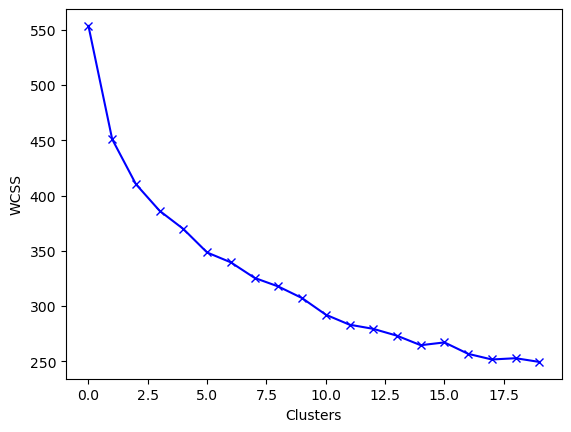

In [207]:
import matplotlib.pyplot as plt
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## 4.3 Clustering with K-Means

In [231]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [232]:
labels = kmeans.labels_
labels, len(labels)

(array([0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
        2, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0,
        0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,
        0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1,
        2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0,
        2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 

In [233]:
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([243,  48,  56], dtype=int64))

In [234]:
kmeans.cluster_centers_

array([[ 1.71397703e-02,  1.78038575e-02,  6.37039823e-03,
         7.88737408e-01,  8.19715035e-01,  2.05948694e-01,
         5.02590869e-01,  2.52603934e-01,  4.12824147e-01,
         8.79532811e-01,  1.27551627e-01,  4.87249041e-01,
         6.11572786e-02,  2.88151404e-02,  1.48556580e-02,
         5.56513043e-02,  3.04680334e-02,  6.24785325e-01,
         4.13064957e-01,  1.03126836e-02,  3.36489794e-02,
         1.75780504e-02,  2.82877917e-02,  3.51662245e-01,
         8.23045267e-03,  1.23456790e-02,  4.11522634e-03,
         8.23045267e-03,  6.07153217e-18,  4.11522634e-03,
         4.11522634e-03,  1.64609053e-02,  1.23456790e-02,
         8.23045267e-03,  4.52674897e-02,  3.03576608e-18,
         8.23045267e-03,  8.23045267e-03,  8.23045267e-03,
         1.64609053e-02,  3.03576608e-18,  3.03576608e-18,
         8.23045267e-03,  8.23045267e-03,  1.64609053e-02,
         4.11522634e-03,  8.23045267e-03,  6.58436214e-02,
         1.23456790e-02,  8.23045267e-03,  1.02880658e-0

In [235]:
dataset.columns

Index(['Valor de M.', 'EV', 'Pes. Fisicas', 'LPA', 'LPA desconctado', 'VPA',
       'P/L', 'P/L descontado', 'P/VPA', 'Margem Segurança',
       ...
       '80', '81', '82', '83', '84', '85', '86', '87', '88', '89'],
      dtype='object', length=114)

In [236]:
import pandas as pd
centroides = pd.DataFrame(data = kmeans.cluster_centers_, columns = [dataset.columns])
centroides

Valor de M.        EV Pes. Fisicas       LPA LPA desconctado       VPA  \
0    0.017140  0.017804     0.006370  0.788737        0.819715  0.205949   
1    0.092151  0.035921     0.012434  0.803088        0.835668  0.204321   
2    0.036923  0.021832     0.038169  0.802820        0.835440  0.204667   

        P/L P/L descontado     P/VPA Margem Segurança Luc. Liquido  \
0  0.502591       0.252604  0.412824         0.879533     0.127552   
1  0.509163       0.257351  0.441675         0.888709     0.192410   
2  0.530641       0.275834  0.460359         0.889746     0.143534   

  Margem Liquida       ROE Patri. Liquido.1 Divida bruta Divida Liquida  \
0       0.487249  0.061157         0.028815     0.014856       0.055651   
1       0.489064  0.064960         0.031028     0.008908       0.046418   
2       0.493969  0.064912         0.026528     0.008695       0.048603   

  Divida Bruta/PL        EF       ECP        EM Pas. Circulante   Caixa.1  \
0        0.030468  0.624785  0.413065  0.010313        0.033649  0.017578   
1        0.013217  0.625941  0.326972  0.001480        0.031656  0.028747   
2        0.017198  0.627739  0.341310  0.008367        0.028115  0.014713   

  Liq. Imediata Capital de giro             0             1         2  \
0      0.028288        0.351662  8.230453e-03  1.234568e-02  0.004115   
1      0.059504        0.359659  2.602085e-18  5.204170e-18  0.020833   
2      0.035359        0.349632  2.602085e-18  1.785714e-02  0.035714   

              3             4             5             6             7  \
0  8.230453e-03  6.071532e-18  4.115226e-03  4.115226e-03  1.646091e-02   
1  5.204170e-18  2.083333e-02  1.301043e-18  1.301043e-18  6.938894e-18   
2  3.571429e-02  1.785714e-02  1.301043e-18  1.301043e-18  1.785714e-02   

              8         9        10            11            12            13  \
0  1.234568e-02  0.008230  0.045267  3.035766e-18  8.230453e-03  8.230453e-03   
1  5.204170e-18  0.000000  0.187500  1.301043e-18  2.602085e-18  2.602085e-18   
2  1.785714e-02  0.017857  0.125000  1.785714e-02  2.602085e-18  2.602085e-18   

             14            15            16            17            18  \
0  8.230453e-03  1.646091e-02  3.035766e-18  3.035766e-18  8.230453e-03   
1  4.166667e-02  4.166667e-02  2.083333e-02  2.083333e-02  2.602085e-18   
2  5.204170e-18  3.469447e-18  1.301043e-18  1.301043e-18  2.602085e-18   

             19            20            21        22            23  \
0  8.230453e-03  1.646091e-02  4.115226e-03  0.008230  6.584362e-02   
1  2.602085e-18  5.204170e-18  1.301043e-18  0.000000  2.083333e-02   
2  2.602085e-18  5.204170e-18  1.301043e-18  0.017857  1.387779e-17   

             24            25        26            27            28  \
0  1.234568e-02  8.230453e-03  0.102881  4.115226e-03  4.115226e-03   
1  5.204170e-18  2.602085e-18  0.083333  1.301043e-18  1.301043e-18   
2  1.785714e-02  2.602085e-18  0.196429  1.301043e-18  1.301043e-18   

             29            30            31            32            33  \
0  3.035766e-18  8.230453e-03  3.292181e-02  1.234568e-02  1.234568e-02   
1  1.301043e-18  2.602085e-18  4.166667e-02  6.938894e-18  6.250000e-02   
2  1.785714e-02  2.602085e-18  3.469447e-18  3.571429e-02  3.469447e-18   

             34        35            36            37            38  \
0  8.230453e-03  0.057613  6.071532e-18  1.234568e-02  3.703704e-02   
1  2.602085e-18  0.020833  2.083333e-02  0.000000e+00  1.387779e-17   
2  2.602085e-18  0.017857  1.785714e-02  1.734723e-18  3.571429e-02   

             39            40            41            42            43  \
0  8.673617e-18  8.230453e-03  8.230453e-03  8.230453e-03  8.230453e-03   
1  2.083333e-02  2.602085e-18  2.602085e-18  2.602085e-18  2.602085e-18   
2  3.571429e-02  2.602085e-18  2.602085e-18  2.602085e-18  2.602085e-18   

             44            45            46            47            48  \
0  8.230453e-03  2.057613e-02  8.230453e-03  4.115226e

In [237]:
scaler

MinMaxScaler()

In [238]:
centroides = scaler.inverse_transform(centroides)
centroides = pd.DataFrame(data = centroides, columns=[dataset.columns])
centroides

Valor de M.            EV  Pes. Fisicas        LPA LPA desconctado  \
0  4.913855e+09  8.873909e+09  11491.433800 -12.151146      -13.634886   
1  2.641881e+10  1.793046e+10  22427.625000   2.304375        1.798271   
2  1.058551e+10  1.088747e+10  68848.147646   2.035172        1.578518   

         VPA        P/L P/L descontado     P/VPA Margem Segurança  \
0  46.654486   1.746867       7.301137  1.061583    -11813.539400   
1  16.208333  13.102499      13.305388  2.225992      -672.510528   
2  22.679500  50.216428      36.683879  2.980093       586.698166   

  Luc. Liquido Margem Liquida        ROE Patri. Liquido.1 Divida bruta  \
0    45.425337      -8.761653  17.456122      3939.999354  3839.712214   
1  1336.682500      21.007839  18.541667      4589.104046  2302.377644   
2   363.612967     101.470978  18.527857      3269.254983  2247.281291   

  Divida Liquida Divida Bruta/PL         EF        ECP         EM  \
0    2700.539019        2.071826  27.455858  41.306496  70.333715   
1     778.819907        0.898727  31.057811  32.697183  10.961419   
2    1233.595207        1.169474  36.663102  34.131015  57.257589   

  Pas. Circulante      Caixa.1 Liq. Imediata Capital de giro             0  \
0     2732.153063  1259.713401      0.862778      695.899867  8.230453e-03   
1     2570.411958  2060.145570      1.814875     1485.827070  2.602085e-18   
2     2282.989980  1054.379845      1.078449      495.343354  2.602085e-18   

              1         2             3             4             5  \
0  1.234568e-02  0.004115  8.230453e-03  6.071532e-18  4.115226e-03   
1  5.204170e-18  0.020833  5.204170e-18  2.083333e-02  1.301043e-18   
2  1.785714e-02  0.035714  3.571429e-02  1.785714e-02  1.301043e-18   

              6             7             8         9        10            11  \
0  4.115226e-03  1.646091e-02  1.234568e-02  0.008230  0.045267  3.035766e-18   
1  1.301043e-18  6.938894e-18  5.204170e-18  0.000000  0.187500  1.301043e-18   
2  1.301043e-18  1.785714e-02  1.785714e-02  0.017857  0.125000  1.785714e-02   

             12            13            14            15            16  \
0  8.230453e-03  8.230453e-03  8.230453e-03  1.646091e-02  3.035766e-18   
1  2.602085e-18  2.602085e-18  4.166667e-02  4.166667e-02  2.083333e-02   
2  2.602085e-18  2.602085e-18  5.204170e-18  3.469447e-18  1.301043e-18   

             17            18            19            20            21  \
0  3.035766e-18  8.230453e-03  8.230453e-03  1.646091e-02  4.115226e-03   
1  2.083333e-02  2.602085e-18  2.602085e-18  5.204170e-18  1.301043e-18   
2  1.301043e-18  2.602085e-18  2.602085e-18  5.204170e-18  1.301043e-18   

         22            23            24            25        26            27  \
0  0.008230  6.584362e-02  1.234568e-02  8.230453e-03  0.102881  4.115226e-03   
1  0.000000  2.083333e-02  5.204170e-18  2.602085e-18  0.083333  1.301043e-18   
2  0.017857  1.387779e-17  1.785714e-02  2.602085e-18  0.196429  1.301043e-18   

             28            29            30            31            32  \
0  4.115226e-03  3.035766e-18  8.230453e-03  3.292181e-02  1.234568e-02   
1  1.301043e-18  1.301043e-18  2.602085e-18  4.166667e-02  6.938894e-18   
2  1.301043e-18  1.785714e-02  2.602085e-18  3.469447e-18  3.571429e-02   

             33            34        35            36            37  \
0  1.234568e-02  8.230453e-03  0.057613  6.071532e-18  1.234568e-02   
1  6.250000e-02  2.602085e-18  0.020833  2.083333e-02  0.000000e+00   
2  3.469447e-18  2.602085e-18  0.017857  1.785714e-02  1.734723e-18   

             38            39            40            41            42  \
0  3.703704e-02  8.673617e-18  8.230453e-03  8.230453e-03  8.230453e-03   
1  1.387779e-17  2.083333e-02  2.602085e-18  2.602085e-18  2.602085e-18   
2  3.571429e-02  3.571429e-02  2.602085e-18  2.602085e-18  2.602085e-18   

             43            44            45            46            47  \
0  8.230453e-03  8.230453e-03  2.057613e-02 

In [239]:
dataset_cluster = pd.concat([empresa, pd.DataFrame({'cluster': labels})], axis = 1)
dataset_cluster

Empresa  cluster
0        aes elpa s.a       0.0
1       tiet aes tiete      2.0
2        aflu afluente      0.0
3      aflu afluente t      0.0
4    rpad alfa holding      1.0
..                 ...      ...
297                NaN      0.0
311                NaN      0.0
332                NaN      0.0
333                NaN      0.0
334                NaN      0.0

[374 rows x 2 columns]

In [240]:
dataset_cluster = pd.concat([dataset_original, pd.DataFrame({'cluster': labels})], axis = 1)
dataset_cluster

Situação            Empresa          Segmento   Valor de M.            EV  \
0       ruim      aes elpa s.a   energia eletrica  1.334627e+09  4.391657e+09   
1        boa     tiet aes tiete  energia eletrica  1.519060e+10  1.021776e+10   
2       ruim      aflu afluente  energia eletrica  9.465319e+07  8.565319e+07   
3       ruim    aflu afluente t  energia eletrica  2.819886e+08  2.439886e+08   
4       ruim  rpad alfa holding            bancos  2.887665e+08  2.857665e+08   
..       ...                ...               ...           ...           ...   
297      NaN                NaN               NaN           NaN           NaN   
311      NaN                NaN               NaN           NaN           NaN   
332      NaN                NaN               NaN           NaN           NaN   
333      NaN                NaN               NaN           NaN           NaN   
334      NaN                NaN               NaN           NaN           NaN   

     Pes. Fisicas             Categoria   LPA  LPA desconctado    VPA    P/L  \
0         15969.0                alerta  0.57             0.56  36.03  24.71   
1         18681.0            dividendos  0.18             0.18   0.80  14.92   
2          1898.0                alerta  0.16             0.15   2.07  31.55   
3             8.0                alerta  0.21             0.20   1.23  21.69   
4         11290.0  crescimento moderado  0.60             0.60  10.42   5.65   
..            ...                   ...   ...              ...    ...    ...   
297           NaN                   NaN   NaN              NaN    NaN    NaN   
311           NaN                   NaN   NaN              NaN    NaN    NaN   
332           NaN                   NaN   NaN              NaN    NaN    NaN   
333           NaN                   NaN   NaN              NaN    NaN    NaN   
334           NaN                   NaN   NaN              NaN    NaN    NaN   

     P/L descontado  P/VPA  Margem Segurança  Luc. Liquido  Margem Liquida  \
0             24.71   0.38             -0.53         555.0          0.0648   
1             14.92   3.39             22.00         703.0         34.6900   
2             31.55   2.42            -63.00          13.0         38.1500   
3             21.69   3.61             46.00          17.0         56.0000   
4              5.65   0.32            116.00          45.0        157.4500   
..              ...    ...               ...           ...             ...   
297             NaN    NaN               NaN           NaN             NaN   
311             NaN    NaN               NaN           NaN             NaN   
332             NaN    NaN               NaN           NaN             NaN   
333             NaN    NaN               NaN           NaN             NaN   
334             NaN    NaN               NaN           NaN             NaN   

       ROE  Patri. Liquido.1  Divida bruta  Divida Liquida  Divida Bruta/PL  \
0    20.66            2012.0        2721.0         1567.00         0.860000   
1    37.00            1812.0        2997.0         2459.00         1.720000   
2    25.00              48.0           0.0           -8.00         1.720811   
3    22.00              78.0           3.0          -31.00         0.040000   
4     6.00             721.0         140.0         -440.75         0.250000   
..     ...               ...           ...             ...              ...   
297    NaN               NaN           NaN             NaN              NaN   
311    NaN               NaN           NaN             NaN              NaN   
332    NaN               NaN           NaN             NaN              NaN   
333    NaN               NaN           NaN             NaN              NaN   
334    NaN               NaN           NaN             NaN              NaN   

            EF        ECP    EM  Pas. Circulante  Caixa.1  Liq. Imediata  \
0    49.000000  11.000000  3.94           4508.0    545.0           0.12   
1    58.000000  15.000000  2.40 

In [241]:
categoria_cluster = dataset_cluster.groupby(['Categoria', 'cluster'])['cluster'].count()
categoria_cluster

Categoria                 cluster
alerta                    0.0        164
                          1.0         26
                          2.0         37
crescimento               0.0         11
                          1.0          3
                                    ... 
crescimento moderado      2.0          4
dividendos                0.0         19
                          1.0          4
                          2.0          8
dividendos + crescimento  0.0          2
Name: cluster, Length: 13, dtype: int64

In [242]:
situacao_cluster = dataset_cluster.groupby(['Situação', 'cluster'])['cluster'].count()
situacao_cluster

Situação  cluster
boa       0.0         48
          1.0         16
          2.0         17
medio     0.0         58
          1.0         12
          2.0         10
ruim      0.0        117
          1.0         17
          2.0         25
Name: cluster, dtype: int64

In [243]:
pd.options.display.max_rows = 10

In [244]:
segmento_cluster = dataset_cluster.groupby(['Segmento', 'cluster'])['cluster'].count()
segmento_cluster

Segmento               cluster
acessorios             0.0        2
agricultura            0.0        3
                       2.0        1
agua e saneamento      0.0        4
alimentos              0.0        3
                                 ..
transporte rodoviario  0.0        1
                       1.0        1
utensilios domesticos  0.0        2
vestuario              0.0        1
viagens e turismo      0.0        1
Name: cluster, Length: 132, dtype: int64

## 4.4 Visualizing the Clusters

In [245]:
from sklearn.decomposition import PCA

In [246]:
pca = PCA(n_components=2)
componentes = pca.fit_transform(X)
componentes

array([[-2.75201408e-01,  5.45853251e-01],
       [ 8.19669012e-01,  1.17433541e+00],
       [-2.98749914e-01,  5.07227990e-01],
       [-2.81336356e-01,  5.27458426e-01],
       [ 1.03161022e+00, -6.59829915e-01],
       [-3.38428669e-01, -4.15261106e-02],
       [-3.56596089e-01, -4.06225805e-02],
       [-3.50284474e-01, -3.51278300e-02],
       [ 9.04594403e-01, -5.93722755e-01],
       [-2.76915356e-01,  5.41783371e-01],
       [-3.51295574e-01, -2.13473192e-02],
       [ 7.33948767e-01,  5.33285479e-01],
       [-3.93215498e-01, -9.80923674e-02],
       [ 9.75579229e-01, -5.78544845e-01],
       [-3.99495343e-01, -8.86169718e-02],
       [-3.31423760e-01,  2.82640369e-03],
       [ 9.81685776e-01,  4.93714882e-02],
       [-3.29922922e-01, -8.42589423e-04],
       [-4.19308292e-01, -1.43817183e-01],
       [ 6.96571273e-01, -6.53427922e-02],
       [-3.75306351e-01, -7.69593429e-02],
       [-4.00687127e-01, -9.19143062e-02],
       [ 5.66575225e-01,  4.36142827e-02],
       [ 1.

In [247]:
pca_df = pd.DataFrame(data = componentes, columns=['pca1', 'pca2'])
pca_df.head()

pca1      pca2
0 -0.275201  0.545853
1  0.819669  1.174335
2 -0.298750  0.507228
3 -0.281336  0.527458
4  1.031610 -0.659830

In [248]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -0.275201  0.545853        0
1  0.819669  1.174335        2
2 -0.298750  0.507228        0
3 -0.281336  0.527458        0
4  1.031610 -0.659830        1

<Axes: xlabel='pca1', ylabel='pca2'>

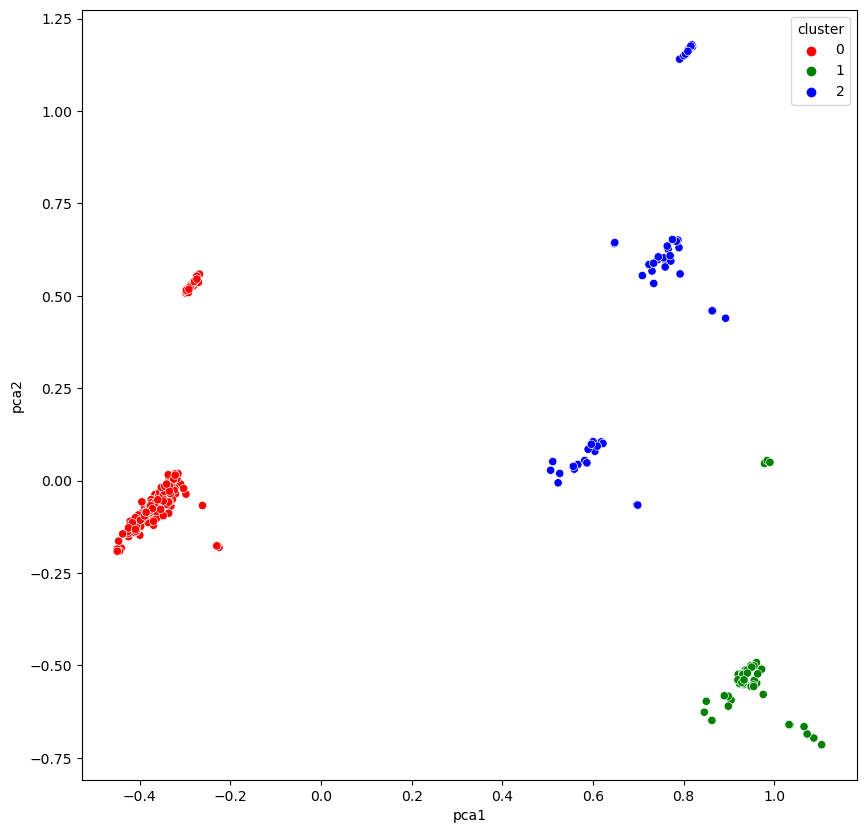

In [249]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue'])